## Final Project Submission

Please fill out:
* Student name: Edward Cheng
* Student pace: Self paced
* Scheduled project review date/time: N/A
* Instructor name: Jeff Herman
* Blog post URL: https://medium.com/@edwardcheng22


# 1) Initial Set Up

<b>Import Libraries</b>

In [1]:
# Import Data Cleaning and Visualizing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import Statistics libraries
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

<b>Import Data</b>

In [3]:
df = pd.read_csv('kc_house_data.csv')

Preview Data Set

In [4]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

Inspect the Columns

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

We can identify the column 'id' as not having much relevance, since it does not provide much meaning besides acting as a reference to sales transaction the property, so let's drop it

In [6]:
df.drop('id', axis = 1, inplace = True)

In [7]:
df

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      10/13/2014  221900.0         3       1.00         1180      5650   
1       12/9/2014  538000.0         3       2.25         2570      7242   
2       2/25/2015  180000.0         2       1.00          770     10000   
3       12/9/2014  604000.0         4       3.00         1960      5000   
4       2/18/2015  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21592   5/21/2014  360000.0         3       2.50         1530      1131   
21593   2/23/2015  400000.0         4       2.50         2310      5813   
21594   6/23/2014  402101.0         2       0.75         1020      1350   
21595   1/16/2015  400000.0         3       2.50         1600      2388   
21596  10/15/2014  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above sqft_basement  \
0         1.0         NaN   0.0          3      7        1180           0.0   
1         2.0         0.0   0.0          3      7        2170         400.0   
2         1.0         0.0   0.0          3      6         770           0.0   
3         1.0         0.0   0.0          5      7        1050         910.0   
4         1.0         0.0   0.0          3      8        1680           0.0   
...       ...         ...   ...        ...    ...         ...           ...   
21592     3.0         0.0   0.0          3      8        1530           0.0   
21593     2.0         0.0   0.0          3      8        2310           0.0   
21594     2.0         0.0   0.0          3      7        1020           0.0   
21595     2.0         NaN   0.0          3      8        1600           0.0   
21596     2.0         0.0   0.0          3      7        1020           0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955           0.0    98178  47.5112 -122.257           1340   
1          1951        1991.0    98125  47.7210 -122.319           1690   
2          1933           NaN    98028  47.7379 -122.233           2720   
3          1965           0.0    98136  47.5208 -122.393           1360   
4          1987           0.0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009           0.0    98103  47.6993 -122.346           1530   
21593      2014           0.0    98146  47.5107 -122.362           1830   
21594      2009           0.0    98144  47.5944 -122.299           1020   
21595      2004           0.0    98027  47.5345 -122.069           1410   
21596      2008           0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21592        1509  
21593        7200  
21594        2007  
21595        1287  
21596        1357  

[21597 rows x 20 columns]

Great! Now let's summarize the central tendency, dispersion and shape of a dataset’s distribution

In [8]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  19221.000000  21534.000000  21597.000000  21597.000000   
mean       1.494096      0.007596      0.233863      3.409825      7.657915   
std        0.539683      0.086825      0.765686      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above      yr_built  yr_renovated       zipcode           lat  \
count  21597.000000  21597.000000  17755.000000  21597.000000  21597.000000   
mean    1788.596842   1970.999676     83.636778  98077.951845     47.560093   
std      827.759761     29.375234    399.946414     53.513072      0.138552   
min      370.000000   1900.000000      0.000000  98001.000000     47.155900   
25%     1190.000000   1951.000000      0.000000  98033.000000     47.471100   
50%     1560.000000   1975.000000      0.000000  98065.000000     47.571800   
75%     2210.000000   1997.000000      0.000000  98118.000000     47.678000   
max     9410.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21597.000000   21597.000000   21597.000000  
mean    -122.213982    1986.620318   12758.283512  
std        0.140724     685.230472   27274.441950  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.231000    1840.000000    7620.000000  
75%     -122.125000    2360.000000   10083.000000  
max     -121.315000    6210.000000  871200.000000

# 2) Data Cleaning 

We are now going to proceed with the Data Cleaning Process. Throughout this, we will investigate the following:

- Casting columns to the appropriate data types
- Identifying and dealing with null values appropriately
- Checking for Outliers
- Dealing with categorical variables

<b> 1) Casting columns to the appropriate data types</b> 

Check index and column dtypes to identify which data types are not accurate

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

We can conclude the following things:

- The 'Date' column should not be an object dtype
    - Should be converted to datetime
- The 'sqft_basement' column should also not be an object dtype
    - Should be converted to float64

Let's deal with the date column first

In [10]:
# Convert Date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [11]:
# Check to see if date is now a numerical data type
print(df.date.dtype)

datetime64[ns]


Now let's work with the sqft_basement

In [12]:
df['sqft_basement'].value_counts(normalize = True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
861.0     0.000046
20.0      0.000046
1024.0    0.000046
2180.0    0.000046
906.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64

About 2% of the sqft_basement data is filled in with a placeholder value. We can either remove them or try to fill in those values. Let's examine the relationship between 'sqft_basement', 'sqft above', and 'sqft living'.

Sqft basement is calculated by the difference between Sqft living and Sqft above, so we can try to see if some of those placeholder values can be filled in given the difference. If the Sqft living does not equal Sqft above, that means that there must be a basement.

In [13]:
# For loop that iterates through each entry and calculates the difference between the aforementioned columns 
for i in list(df.loc[df['sqft_basement'] == '?'].index.values):
    df.loc[i, 'sqft_basement'] = df.loc[i, 'sqft_living'] - df.loc[i, 'sqft_above']

In [14]:
# Confirm now that the 'sqft basement' column is a float data type
df['sqft_basement'] = df['sqft_basement'].astype('float64')
print(df.sqft_basement.dtype)

float64


An interesting fact that we haven't address yet though, is that nearly 60% of the houses in the data do not have a basement. Thus, because of the sheer amount of non-basement houses, we will elect to transform this column into a binary format: with or without basement. Observe in the graph below to see the difference.

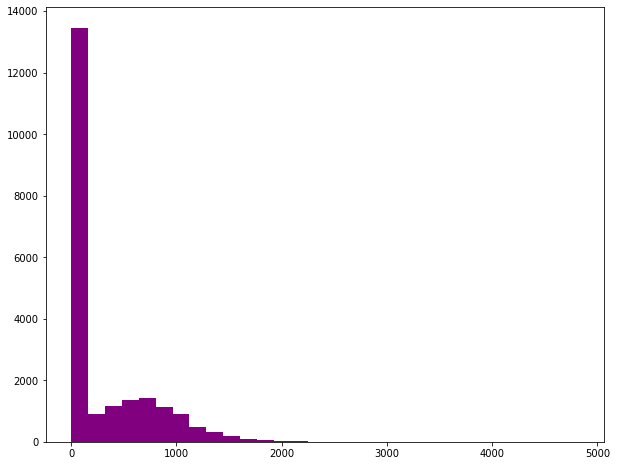

In [15]:
plt.figure(figsize = (10, 8))
plt.hist(df['sqft_basement'],bins = 30, color = 'purple');

In [16]:
# Transform to binary format. Assign a value of 0 if there is no basement and 1 if there is
df['basement'] = df['sqft_basement'].map(lambda x: 0 if x == 0 else 1)
df.drop('sqft_basement', axis = 1, inplace = True)

In [17]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  yr_built  yr_renovated  \
0         NaN   0.0          3      7        1180      1955           0.0   
1         0.0   0.0          3      7        2170      1951        1991.0   
2         0.0   0.0          3      6         770      1933           NaN   
3         0.0   0.0          5      7        1050      1965           0.0   
4         0.0   0.0          3      8        1680      1987           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  basement  
0    98178  47.5112 -122.257           1340        5650         0  
1    98125  47.7210 -122.319           1690        7639         1  
2    98028  47.7379 -122.233           2720        8062         0  
3    98136  47.5208 -122.393           1360        5000         1  
4    98074  47.6168 -122.045           1800        7503         0

Now that we have casted the columns to the appropriate data types, we can move on to dealing with any NA values

<b>2) Identifying and dealing with null values appropriately</b>

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  float64       
 8   view           21534 non-null  float64       
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   17755 non-null  float64       
 14  zipcode        21597 non-null  int64         
 15  lat            2159

In [19]:
len(df)

21597

In [20]:
# Checks to see which columns have null values
df.isnull().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
basement         False
dtype: bool

We can see that a full column should have 21597 entries. There are 3 columns that do not satisfy this:

- <b>Waterfront</b>
- <b>View</b>
- <b>yr_renovated</b>

In [21]:
# Calculate the sum of NA values in these columns:
df.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
basement            0
dtype: int64

In [22]:
# Observe what percentage of NA values in the total data set are in view
df['view'].isnull().sum() / len(df) * 100

0.29170718155299347

The NA values in the View column constitutes for only 0.3% of the entire dataset, so let's just drop them because it is so insiginficant

In [23]:
df.dropna(subset = ['view'], inplace = True)
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  yr_built  yr_renovated  \
0         NaN   0.0          3      7        1180      1955           0.0   
1         0.0   0.0          3      7        2170      1951        1991.0   
2         0.0   0.0          3      6         770      1933           NaN   
3         0.0   0.0          5      7        1050      1965           0.0   
4         0.0   0.0          3      8        1680      1987           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  basement  
0    98178  47.5112 -122.257           1340        5650         0  
1    98125  47.7210 -122.319           1690        7639         1  
2    98028  47.7379 -122.233           2720        8062         0  
3    98136  47.5208 -122.393           1360        5000         1  
4    98074  47.6168 -122.045           1800        7503         0

Let's take a further look into the views column

In [24]:
df.view.value_counts(normalize = True)

0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64

First off, we notice that this variable is measured on a 1.0 - 4.0 scale. We can probably infer that this is a categorical variable, in which the numbers represent the number of times a house was visited. Because 90% of the views were 0, we can probably just drop this whole column because it isn't telling us much.

In [25]:
df.drop('view', axis = 1, inplace = True)
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   waterfront  condition  grade  sqft_above  yr_built  yr_renovated  zipcode  \
0         NaN          3      7        1180      1955           0.0    98178   
1         0.0          3      7        2170      1951        1991.0    98125   
2         0.0          3      6         770      1933           NaN    98028   
3         0.0          5      7        1050      1965           0.0    98136   
4         0.0          3      8        1680      1987           0.0    98074   

       lat     long  sqft_living15  sqft_lot15  basement  
0  47.5112 -122.257           1340        5650         0  
1  47.7210 -122.319           1690        7639         1  
2  47.7379 -122.233           2720        8062         0  
3  47.5208 -122.393           1360        5000         1  
4  47.6168 -122.045           1800        7503         0

Great! The view column is removed.
Now let's deal with the null values in waterfront

In [26]:
# Observe what percentage of NA values in the total data set are in waterfront
df['waterfront'].isnull().sum() / len(df) * 100

11.005851212036779

11% of the data are NA in this column. 

In [27]:
df.waterfront.value_counts(normalize = True)

0.0    0.992434
1.0    0.007566
Name: waterfront, dtype: float64

Waterfront seems to be a categorical variable as well, given that it is measured by only 0 and 1. 11% is a small percentage of NA values, so let's just fill it in with a median value of 0.0

In [28]:
df['waterfront'] = df['waterfront'].fillna(value=0.0)

In [29]:
# Check to make sure all the NA values were dropped
df.waterfront.isnull().any()

False

Let's examine our last variable that contains NA values

In [30]:
# Check for yr_renovated
df['yr_renovated'].isnull().sum() / len(df) * 100

17.785827064177578

In [31]:
df.yr_renovated.value_counts(normalize = True)

0.0       0.958032
2014.0    0.004123
2003.0    0.001751
2013.0    0.001751
2007.0    0.001695
            ...   
1946.0    0.000056
1959.0    0.000056
1971.0    0.000056
1951.0    0.000056
1954.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64

18% of the data is missing in this column, and also 96% of the data has a value of 0, meaning that this column really doesn't offer any relevant information at all because the majority of the data does not have any value at all, so let's drop this entire column.

In [32]:
# Drop yr_renovated
df.drop('yr_renovated', axis = 1, inplace = True)

Now that we have dealt with all the NA values, let's do a final check to make sure our dataframe does not have any more NA values

In [33]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
basement         0
dtype: int64

Everything looks good now! Now we can move on to the next step, which is dealing with outliers

<b>3) Checking for Outliers

Let's take a look at how all the data is spread out using .describe()

In [34]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.153400e+04  21534.000000  21534.000000  21534.000000  2.153400e+04   
mean   5.400577e+05      3.373038      2.115712   2079.827854  1.509060e+04   
std    3.660596e+05      0.926410      0.768602    917.446520  4.138021e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.617000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068775e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront     condition         grade    sqft_above  \
count  21534.000000  21534.000000  21534.000000  21534.000000  21534.000000   
mean       1.494126      0.006734      3.409724      7.657425   1788.557537   
std        0.539806      0.081783      0.650654      1.172643    827.745641   
min        1.000000      0.000000      1.000000      3.000000    370.000000   
25%        1.000000      0.000000      3.000000      7.000000   1190.000000   
50%        1.500000      0.000000      3.000000      7.000000   1560.000000   
75%        2.000000      0.000000      4.000000      8.000000   2210.000000   
max        3.500000      1.000000      5.000000     13.000000   9410.000000   

           yr_built       zipcode           lat          long  sqft_living15  \
count  21534.000000  21534.000000  21534.000000  21534.000000   21534.000000   
mean    1971.002275  98077.939352     47.560180   -122.213948    1986.299944   
std       29.376044     53.506639      0.138528      0.140735     685.121001   
min     1900.000000  98001.000000     47.155900   -122.519000     399.000000   
25%     1951.000000  98033.000000     47.471200   -122.328000    1490.000000   
50%     1975.000000  98065.000000     47.571900   -122.230000    1840.000000   
75%     1997.000000  98118.000000     47.678100   -122.125000    2360.000000   
max     2015.000000  98199.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15      basement  
count   21534.000000  21534.000000  
mean    12751.079502      0.392588  
std     27255.483308      0.488338  
min       651.000000      0.000000  
25%      5100.000000      0.000000  
50%      7620.000000      0.000000  
75%     10083.000000      1.000000  
max    871200.000000      1.000000

The first thing that pops out is the 33 bedrooms. With the 75% percentile being only 4 bedrooms, the one with 33 bedrooms seems extremely un-representative of the dataset, so let's drop that value first

Text(0, 0.5, 'Sales Price')

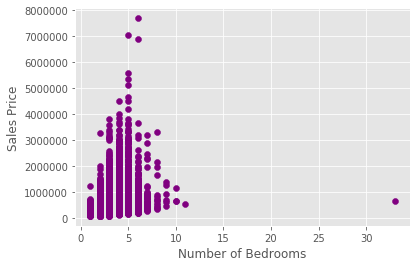

In [35]:
plt.style.use('ggplot')
plt.scatter(df['bedrooms'], df['price'], c = 'purple')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sales Price')

In [36]:
# Drop the value
df = df.drop(df[df["bedrooms"] == 33].index)

To get a better understanding of the general outliers for each respective feature, we will now iterate through each variable and plot a scatter plot to observe any visually striking outliers

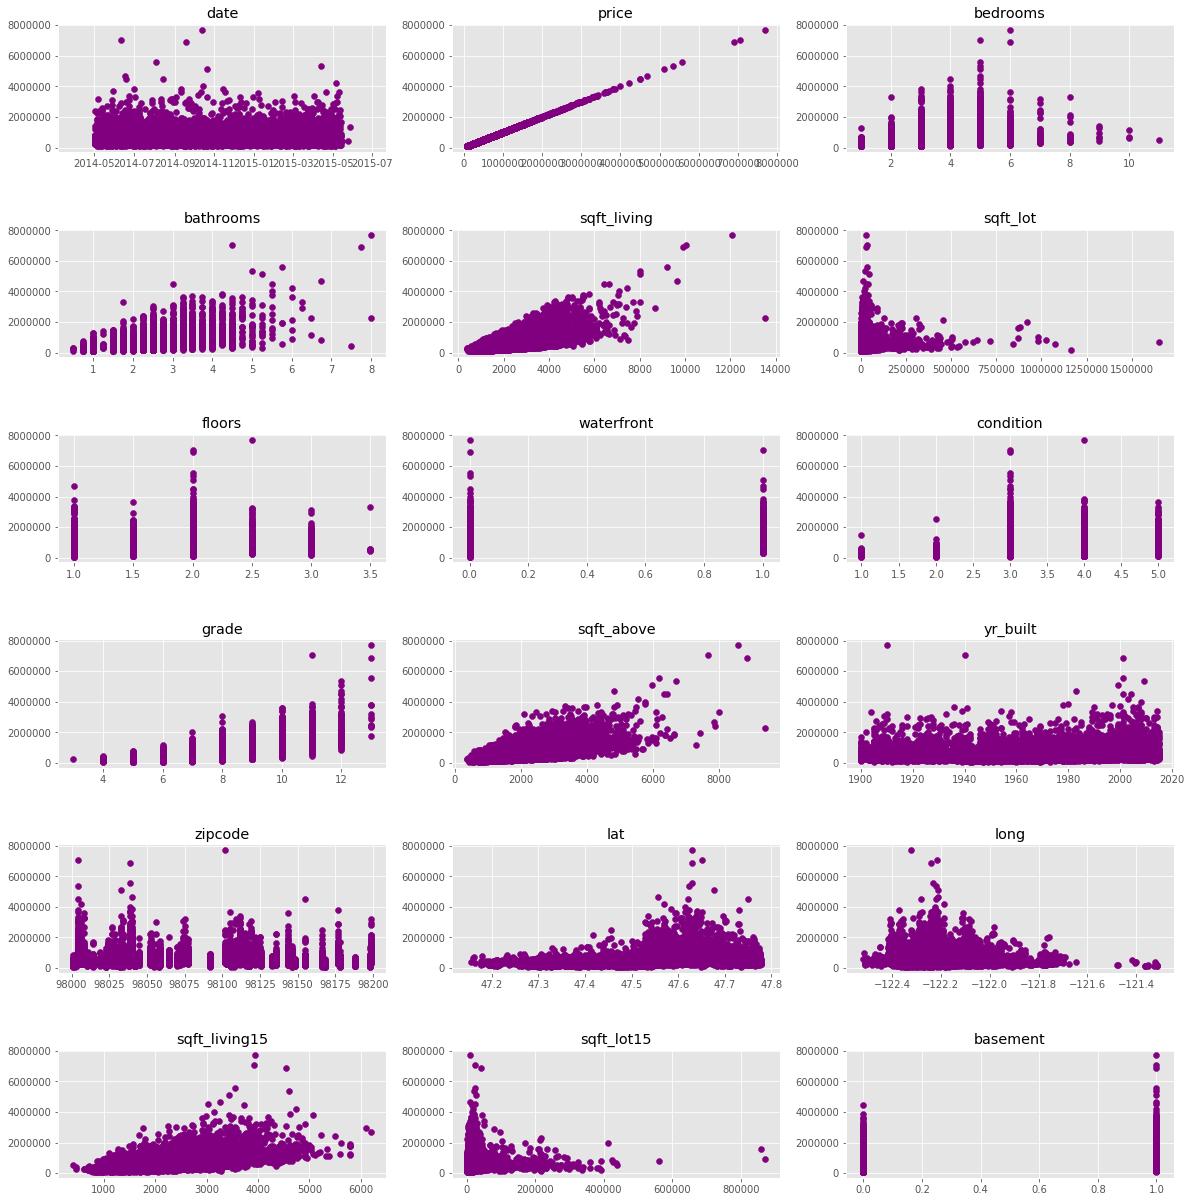

In [37]:
c = [] # Append all the columns to this list
n = 3 # The number of subplots we want on each row

for col in df.columns:
    if df[col].dtype != 'object': # We do not want any columns to have a object data type
        c.append(col)

l = len(c) # Length of the list

fig, axes = plt.subplots(ncols = n, nrows = l // n + 1, figsize = (20, 25))
fig.subplots_adjust(hspace = 0.6) # Adjust the horizontal space between the subplots

for x in range(l):
    ax = axes[x//n][x%n] # This makes sure that the axes are aligned by its respective row and column index
    ax.scatter(df[c[x]], df['price'], color = 'purple') # Plot the respective variable given its axes position
    ax.set_title(c[x])

# Calculating how many spare axes there will be
spare = n * (l // n + 1) - l 

# Delete the spare axes
for y in range(spare):
    fig.delaxes(axes[l // n][n - 1 - y])

From the graphs shown above, we can reasonably say that there are not many striking outliers. However, there are data points present in some of the variables that can be eliminated to make the overall distribution a bit more representative of what we are looking for. I took into consideration the min and max values, and made an educated decision on what to do with values that were below the 25th percentile and higher than the 75th percentile. Using my best judgement, I have decided that the following variables that could be filtered for are:

   - bedrooms
   - bathrooms
   - price
   - sqft_living
   - sqft_lot
   - grade
   - sqft_above
   - sqft_lot15

In [38]:
# Used this as another tool along with the scatter plot to determine what range of values should be cut out
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.153300e+04  21533.000000  21533.000000  21533.000000  2.153300e+04   
mean   5.400530e+05      3.371662      2.115729   2079.849208  1.509102e+04   
std    3.660674e+05      0.904162      0.768616    917.462472  4.138112e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.617000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     11.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront     condition         grade    sqft_above  \
count  21533.000000  21533.000000  21533.000000  21533.000000  21533.000000   
mean       1.494149      0.006734      3.409650      7.657456   1788.592300   
std        0.539808      0.081785      0.650579      1.172661    827.749142   
min        1.000000      0.000000      1.000000      3.000000    370.000000   
25%        1.000000      0.000000      3.000000      7.000000   1190.000000   
50%        1.500000      0.000000      3.000000      7.000000   1560.000000   
75%        2.000000      0.000000      4.000000      8.000000   2210.000000   
max        3.500000      1.000000      5.000000     13.000000   9410.000000   

           yr_built       zipcode           lat          long  sqft_living15  \
count  21533.000000  21533.000000  21533.000000  21533.000000   21533.000000   
mean    1971.003390  98077.938188     47.560174   -122.213943    1986.330423   
std       29.376271     53.507609      0.138529      0.140736     685.122310   
min     1900.000000  98001.000000     47.155900   -122.519000     399.000000   
25%     1951.000000  98033.000000     47.471200   -122.328000    1490.000000   
50%     1975.000000  98065.000000     47.571900   -122.230000    1840.000000   
75%     1997.000000  98118.000000     47.678100   -122.125000    2360.000000   
max     2015.000000  98199.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15      basement  
count   21533.000000  21533.000000  
mean    12751.453397      0.392560  
std     27256.060980      0.488332  
min       651.000000      0.000000  
25%      5100.000000      0.000000  
50%      7620.000000      0.000000  
75%     10083.000000      1.000000  
max    871200.000000      1.000000

I will perform the following filters:

  - Bedrooms greater than 8
  - Bathrooms greater than 6 and less than 1
  - Price greater than 1000000
  - Sqft_living greater than 7000
  - Sqft_lot greater than 600000
  - Grade less than 5
  - Sqft_above greater than 6000
  - Sqft_lot15 greater than 400000

In [39]:
filtered_drop = df.loc[(df['bedrooms'] > 8) | (df['bathrooms'] > 6) | (df['bathrooms'] < 1) |
                (df['price'] > 1000000) | (df['sqft_living'] > 7000) | (df['sqft_lot'] > 600000) | 
                (df['grade'] < 5) | (df['sqft_above'] > 6000) | (df['sqft_lot15'] > 400000)].index
df.drop(filtered_drop, inplace = True)

Great! Now the entire dataset is filtered to be more representative of the 'average' house. The outliers have also been removed. Let's take a look at the new filtered data set.

In [40]:
df.describe()

price      bedrooms     bathrooms   sqft_living  \
count    19968.000000  19968.000000  19968.000000  19968.000000   
mean    468529.088141      3.325220      2.043645   1958.425581   
std     196180.909233      0.869741      0.696108    750.432489   
min      78000.000000      1.000000      1.000000    390.000000   
25%     315000.000000      3.000000      1.500000   1400.000000   
50%     435000.000000      3.000000      2.000000   1840.000000   
75%     594950.000000      4.000000      2.500000   2410.000000   
max    1000000.000000      8.000000      5.750000   6050.000000   

            sqft_lot        floors    waterfront     condition         grade  \
count   19968.000000  19968.000000  19968.000000  19968.000000  19968.000000   
mean    13902.469802      1.472806      0.002254      3.405248      7.513772   
std     32304.480940      0.536784      0.047420      0.644843      1.000631   
min       520.000000      1.000000      0.000000      1.000000      5.000000   
25%      5000.000000      1.000000      0.000000      3.000000      7.000000   
50%      7500.000000      1.000000      0.000000      3.000000      7.000000   
75%     10232.250000      2.000000      0.000000      4.000000      8.000000   
max    577605.000000      3.500000      1.000000      5.000000     12.000000   

         sqft_above      yr_built       zipcode           lat          long  \
count  19968.000000  19968.000000  19968.000000  19968.000000  19968.000000   
mean    1695.374249   1970.864483  98078.555138     47.556214   -122.213372   
std      708.803528     29.075868     53.288345      0.141617      0.141958   
min      390.000000   1900.000000  98001.000000     47.155900   -122.519000   
25%     1170.000000   1952.000000  98033.000000     47.457875   -122.330000   
50%     1510.000000   1974.000000  98065.000000     47.566000   -122.232000   
75%     2080.000000   1996.000000  98118.000000     47.680200   -122.123000   
max     5710.000000   2015.000000  98199.000000     47.777600   -121.315000   

       sqft_living15     sqft_lot15      basement  
count   19968.000000   19968.000000  19968.000000  
mean     1910.157652   12144.544772      0.377204  
std       600.763665   24474.053226      0.484699  
min       399.000000     651.000000      0.000000  
25%      1470.000000    5040.000000      0.000000  
50%      1800.000000    7526.000000      0.000000  
75%      2260.000000    9815.000000      1.000000  
max      4950.000000  392040.000000      1.000000

Now that the outliers and filters have been dealt with in our new data set, let's figure out what to do with the categorical variables

<b> 4) Dealing with Categorical Variables</b>

The nice thing about the scatterplot that we created above is that it can also be used to analyze which variables are categorical. Let's visualize the scatterplot again

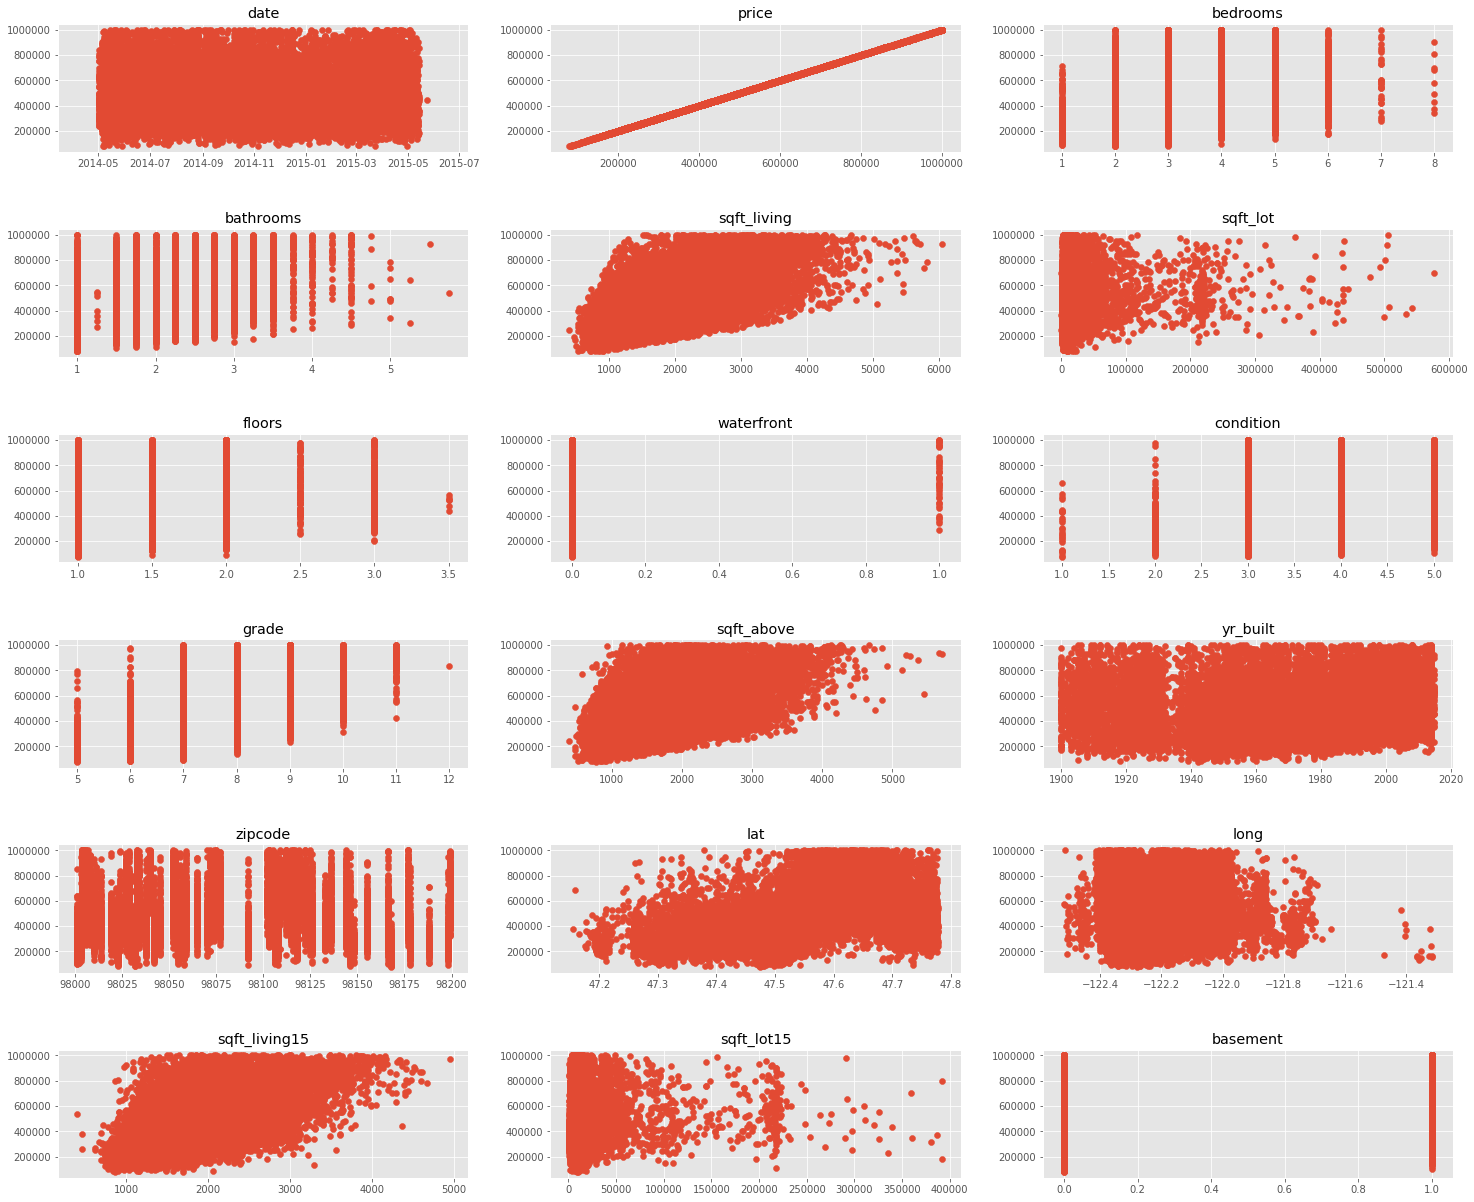

In [41]:
c = [] # Append all the columns to this list
n = 3 # The number of subplots we want on each row

for col in df.columns:
    if df[col].dtype != 'object': # We do not want any columns to have a object data type
        c.append(col)

l = len(c) # Length of the list

fig, axes = plt.subplots(ncols = n, nrows = l // n + 1, figsize = (25, 25))
fig.subplots_adjust(hspace = 0.6) # Adjust the horizontal space between the subplots

for x in range(l):
    ax = axes[x//n][x%n] # This makes sure that the axes are aligned by its respective row and column index
    ax.scatter(df[c[x]], df['price']) # Plot the respective variable given its axes position
    ax.set_title(c[x])

# Calculating how many spare axes there will be
spare = n * (l // n + 1) - l 

# Delete the spare axes
for y in range(spare):
    fig.delaxes(axes[l // n][n - 1 - y])

Notice now after our filtering, all the graphs now don't seem to have any apparent outliers, and the data are all relatively clustered together. From this scatterplot, the following variables appear to be categorical:

   - Date
   - Bedrooms
   - Bathrooms
   - Floors
   - Waterfront
   - Condition
   - Grade
   - Yr_built
   - Zipcode 
   - Basement

However, many of these variables are ordinal, including Bedrooms, Bathrooms, Floors, and Grade. Therefore, we can leave these variables as is when we conduct analysis in the next section. For the variables that are not ordinal, including Waterfront, Condition, Yr_built, zipcode, and basement, we will have to create dummy variables for them to better organize the data. For waterfront and basement, because it is in a binary format (has or has not the feature), we can just get rid of one of the columns for each respective variable, for example instead of keeping both a column for 'with watefront' and another column for 'without waterfront', we can just keep one of them because they are in a binary 0 or 1 format (yes or no).

In [42]:
# Use Dummy Variables to transform Waterfront, condition, and basement first. Zipcode and Yr_built needs a bit of work to organize the data

waterfront_dummies = pd.get_dummies(df['waterfront'], prefix = 'water')
condition_dummies = pd.get_dummies(df['condition'], prefix = 'cond')
basement_dummies = pd.get_dummies(df['basement'], prefix = 'base')

df.drop(["waterfront","condition","basement"], axis=1, inplace = True)

df = pd.concat([df, waterfront_dummies, condition_dummies, basement_dummies], axis = 1)

In [43]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   grade  sqft_above  yr_built  ...  sqft_lot15  water_0.0  water_1.0  cond_1  \
0      7        1180      1955  ...        5650          1          0       0   
1      7        2170      1951  ...        7639          1          0       0   
2      6         770      1933  ...        8062          1          0       0   
3      7        1050      1965  ...        5000          1          0       0   
4      8        1680      1987  ...        7503          1          0       0   

   cond_2  cond_3  cond_4  cond_5  base_0  base_1  
0       0       1       0       0       1       0  
1       0       1       0       0       0       1  
2       0       1       0       0       1       0  
3       0       0       0       1       0       1  
4       0       1       0       0       1       0  

[5 rows x 24 columns]

In [44]:
df.drop(["water_0.0","base_0"], axis=1, inplace = True)

Now for zipcodes. This is a tricky process, but basically, we are trying to separate all the zipcodes listed on the housing website and categorize them based on their letter area. On the website, there are designated zipcodes in areas from A-I, and you will see this below

In [45]:
# Seattle, Shoreline, Lake Forest Park
A_zipcodes = [98177, 98133, 98125, 98155, 98107, 98115, 98105, 98109, 98112,
        98117, 98199, 98122, 98144, 98118, 98108, 98106, 98136, 98126,
        98116, 98102, 98103, 98119, 98134]

# Kirkland, Kenmore, Bothell, Redmond, Woodinville
B_zipcodes = [98053, 98052, 98077, 98072, 98033, 98034, 98011, 98028]

# Bellevue, Medina, Mercer Island, Newcastle
C_zipcodes = [98059, 98056, 98006, 98040, 98008, 98007, 98005, 98004, 98039]

# Renton, Kent
D_zipcodes = [98057, 98055, 98058, 98032, 98031, 98030, 98178]

# Burien, Normandy Park, Des Moines, SeaTac, Tukwilla, Vashon Island
E_zipcodes = [98070, 98146, 98168, 98166, 98198, 98148, 98158, 98188]

# Federal Way, Auburn, Algona, Milton, Pacific
F_zipcodes = [98023, 98003, 98063, 98047, 98001, 98002, 98093, 98071, 98002, 98092]

# Sammamish, Issaquah, Carnation, Duvall
G_zipcodes = [98074, 98075, 98029, 98027, 98019, 98014]

# Covington, Maple Valley, Black Diamond, Enumclaw
H_zipcodes = [98022, 98042, 98010, 98038, 98051]

# Snoquaimie, North Bend
I_zipcodes = [98065, 98045, 98024]

Now we will create a function that can sort these zipcodes into their respective regions

In [46]:
def return_zipcodes(x):
    
    if x in A_zipcodes:
        return 'A'
    elif x in B_zipcodes:
        return 'B'
    elif x in C_zipcodes:
        return 'C'
    elif x in D_zipcodes:
        return 'D'
    elif x in E_zipcodes:
        return 'E'
    elif x in F_zipcodes:
        return 'F'
    elif x in G_zipcodes:
        return 'G'
    elif x in H_zipcodes:
        return 'H'
    elif x in I_zipcodes:
        return 'I'
    else:
        return 'X'

In [47]:
df['zip_categories'] = df['zipcode'].map(return_zipcodes)
zip_dummies = pd.get_dummies(df["zip_categories"], prefix="zip")
df.drop(["zip_categories","zipcode"], axis=1, inplace = True)
df = pd.concat([df, zip_dummies], axis=1)

In [48]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   grade  sqft_above  yr_built  ...  base_1  zip_A  zip_B  zip_C  zip_D  \
0      7        1180      1955  ...       0      0      0      0      1   
1      7        2170      1951  ...       1      1      0      0      0   
2      6         770      1933  ...       0      0      1      0      0   
3      7        1050      1965  ...       1      1      0      0      0   
4      8        1680      1987  ...       0      0      0      0      0   

   zip_E  zip_F  zip_G  zip_H  zip_I  
0      0      0      0      0      0  
1      0      0      0      0      0  
2      0      0      0      0      0  
3      0      0      0      0      0  
4      0      0      1      0      0  

[5 rows x 30 columns]

In [49]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   grade  sqft_above  yr_built  ...  base_1  zip_A  zip_B  zip_C  zip_D  \
0      7        1180      1955  ...       0      0      0      0      1   
1      7        2170      1951  ...       1      1      0      0      0   
2      6         770      1933  ...       0      0      1      0      0   
3      7        1050      1965  ...       1      1      0      0      0   
4      8        1680      1987  ...       0      0      0      0      0   

   zip_E  zip_F  zip_G  zip_H  zip_I  
0      0      0      0      0      0  
1      0      0      0      0      0  
2      0      0      0      0      0  
3      0      0      0      0      0  
4      0      0      1      0      0  

[5 rows x 30 columns]

In [50]:
df['date'] = df['date'].dt.month
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  grade  \
0    10  221900.0         3       1.00         1180      5650     1.0      7   
1    12  538000.0         3       2.25         2570      7242     2.0      7   
2     2  180000.0         2       1.00          770     10000     1.0      6   
3    12  604000.0         4       3.00         1960      5000     1.0      7   
4     2  510000.0         3       2.00         1680      8080     1.0      8   

   sqft_above  yr_built  ...  base_1  zip_A  zip_B  zip_C  zip_D  zip_E  \
0        1180      1955  ...       0      0      0      0      1      0   
1        2170      1951  ...       1      1      0      0      0      0   
2         770      1933  ...       0      0      1      0      0      0   
3        1050      1965  ...       1      1      0      0      0      0   
4        1680      1987  ...       0      0      0      0      0      0   

   zip_F  zip_G  zip_H  zip_I  
0      0      0      0      0  
1      0      0      0      0  
2      0      0      0      0  
3      0      0      0      0  
4      0      1      0      0  

[5 rows x 30 columns]

In [51]:
month_dummies = pd.get_dummies(df['date'], prefix="month")
df.drop(["date"], axis = 1, inplace = True)
df = pd.concat([df, month_dummies], axis = 1)
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  grade  \
0  221900.0         3       1.00         1180      5650     1.0      7   
1  538000.0         3       2.25         2570      7242     2.0      7   
2  180000.0         2       1.00          770     10000     1.0      6   
3  604000.0         4       3.00         1960      5000     1.0      7   
4  510000.0         3       2.00         1680      8080     1.0      8   

   sqft_above  yr_built      lat  ...  month_3  month_4  month_5  month_6  \
0        1180      1955  47.5112  ...        0        0        0        0   
1        2170      1951  47.7210  ...        0        0        0        0   
2         770      1933  47.7379  ...        0        0        0        0   
3        1050      1965  47.5208  ...        0        0        0        0   
4        1680      1987  47.6168  ...        0        0        0        0   

   month_7  month_8  month_9  month_10  month_11  month_12  
0        0        0        0         1         0         0  
1        0        0        0         0         0         1  
2        0        0        0         0         0         0  
3        0        0        0         0         0         1  
4        0        0        0         0         0         0  

[5 rows x 41 columns]

In [52]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  grade  \
0  221900.0         3       1.00         1180      5650     1.0      7   
1  538000.0         3       2.25         2570      7242     2.0      7   
2  180000.0         2       1.00          770     10000     1.0      6   
3  604000.0         4       3.00         1960      5000     1.0      7   
4  510000.0         3       2.00         1680      8080     1.0      8   

   sqft_above  yr_built      lat  ...  month_3  month_4  month_5  month_6  \
0        1180      1955  47.5112  ...        0        0        0        0   
1        2170      1951  47.7210  ...        0        0        0        0   
2         770      1933  47.7379  ...        0        0        0        0   
3        1050      1965  47.5208  ...        0        0        0        0   
4        1680      1987  47.6168  ...        0        0        0        0   

   month_7  month_8  month_9  month_10  month_11  month_12  
0        0        0        0         1         0         0  
1        0        0        0         0         0         1  
2        0        0        0         0         0         0  
3        0        0        0         0         0         1  
4        0        0        0         0         0         0  

[5 rows x 41 columns]

Now that we've converted all our categorical variables into dummy variables, we can now proceed to the next section: Exploratory Data Analysis!

# 3) Exploratory Data Analysis

In this section, having cleaned all our data already, we will perform the following steps:
    1. Examine the general distributions of all the predictor variables
    2. Explore 3-4 questions to see the relationship between the target variable price and the predictor variables.
    3. Check for all the assumptions required to conduct single linear regression
        a) if the requirements are met, we will determine whether or not to use single or multi-variate linear regression   
    4. If the requirements are not met, we will proceed to multi-variate linear regression and check for
           Multicollinearity to avoid high correlation amongst predictor variables

<b>1) Examine the general distributions of all the predictor variables</b>

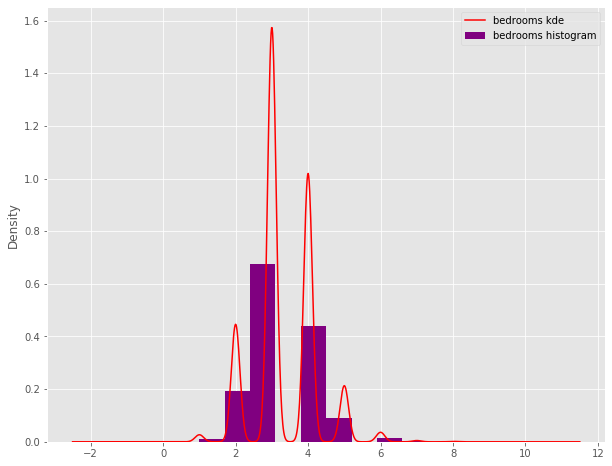

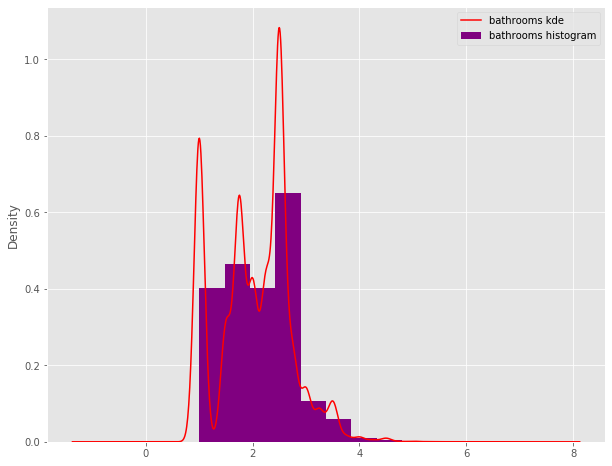

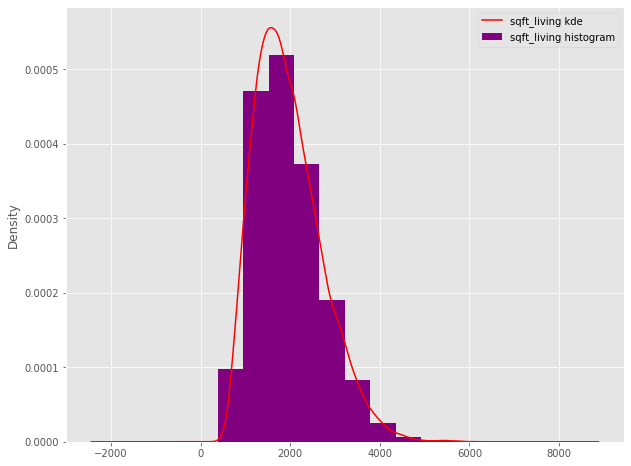

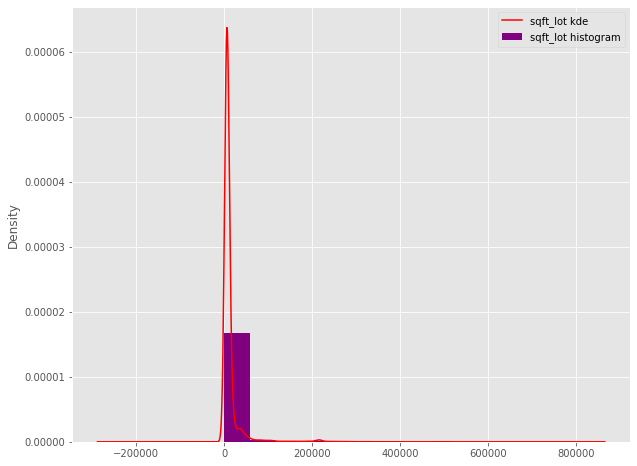

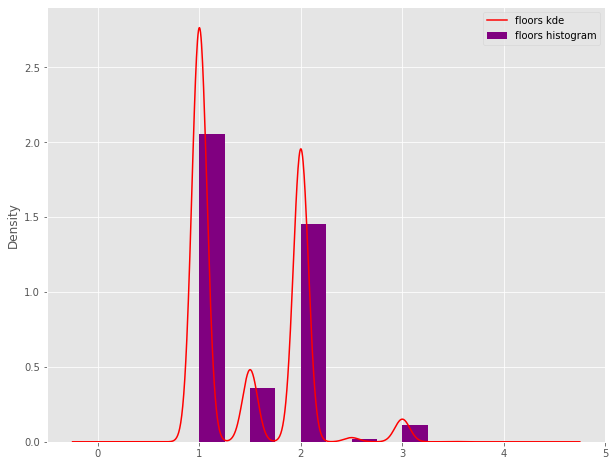

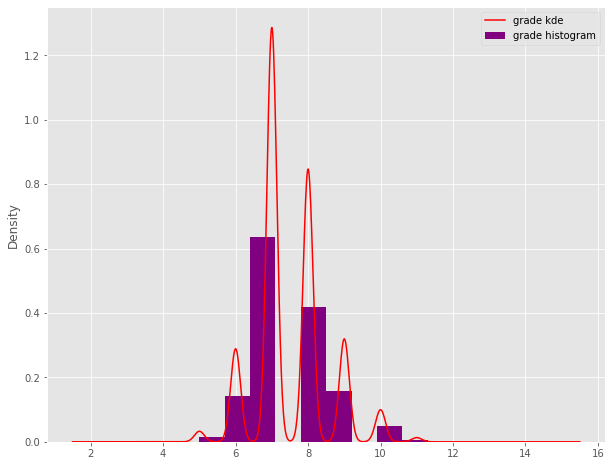

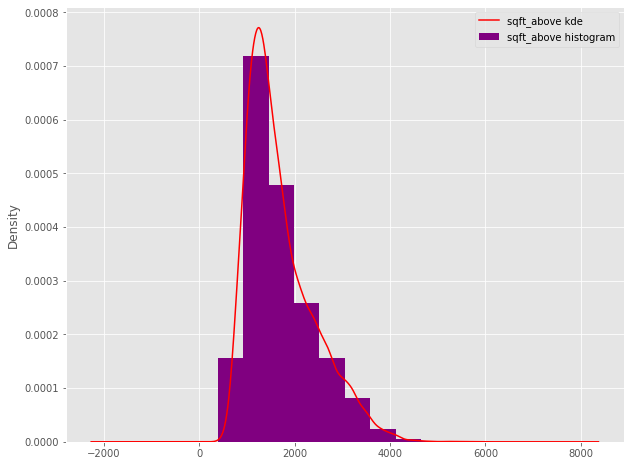

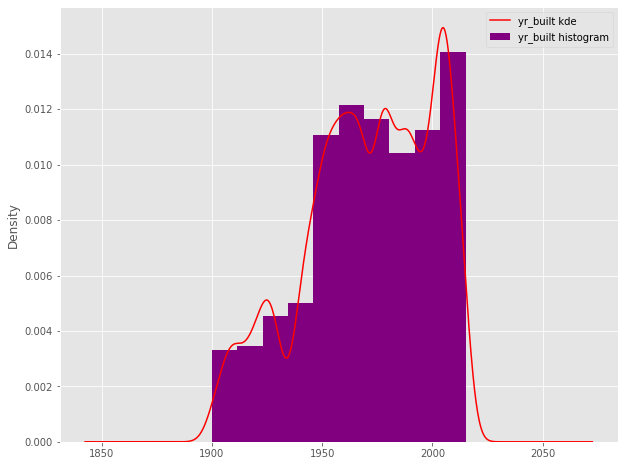

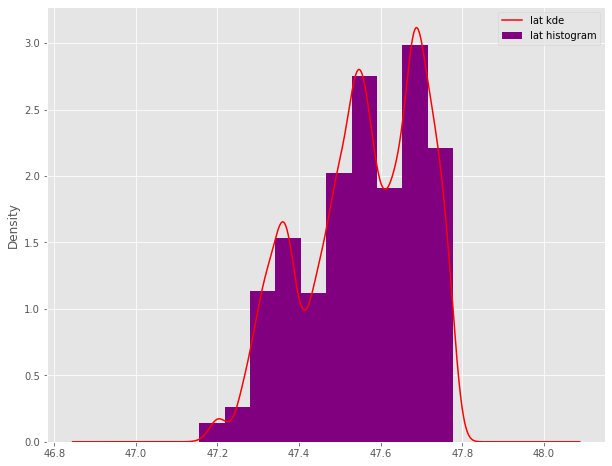

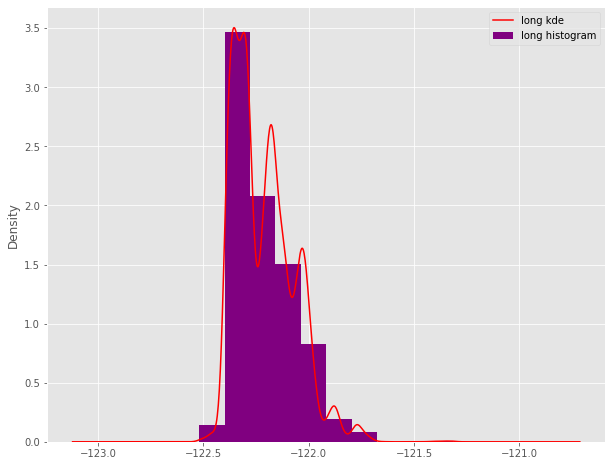

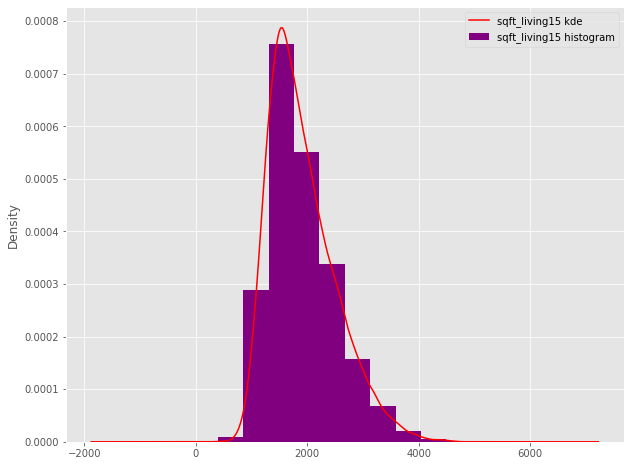

In [53]:
# Plot using KDE and histograms
plt.style.use('ggplot')
for var in df.iloc[:,1:12]: # Does not include all the dummy variables
    df[var].hist(density=True, label = '{} histogram'.format(var), figsize = (10,8), color = 'purple')
    df[var].plot.kde(label = '{} kde'.format(var), color = 'red')
    plt.legend()
    plt.show()

The following variables do not appear to be normally distributed, and includes much variance:
  - bedrooms
  - floors
  - grade
  - lat
  - long

And these are the features that appear to be relatively normal:
   - Bathrooms
   - Sqft_living
   - Sqft_lot
   - Sqft_above
   - Sqft_living15
   - Sqft_lot15
    

That looks better now! Now, let's go explore the relationship between the predictor variables and price

 <b>2) Introduce 3 Questions to Explore</b>

Before we dive into the 3 questions of interest, let's just first get a quick glimpse of which predictor variables are the most correlated with price

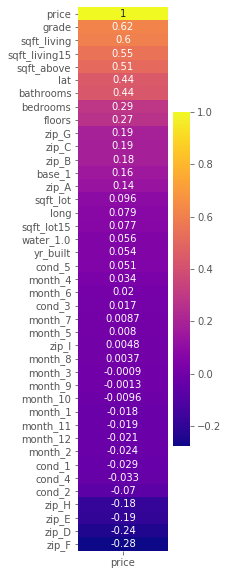

In [54]:
correlation = df.corr()
correlation_model = pd.DataFrame(correlation['price'])
correlation_model.sort_values('price', ascending = False, inplace = True)

fig = plt.figure(figsize=(2,10))
sns.heatmap(correlation_model, annot=True, cmap='plasma')

It seems that the highest correlated variablesare grade, sqft_living, sqft_living15, sqft_above, lat, bathrooms, bedrooms, and floors. We should definitely explore some of these variables further in detail

# 2.1) Are Housing Prices dependent on the location? And if so, do older or newer built houses cost more?

Let's first examine a general distribution of houses using the predictor variables 'lat' and 'long'

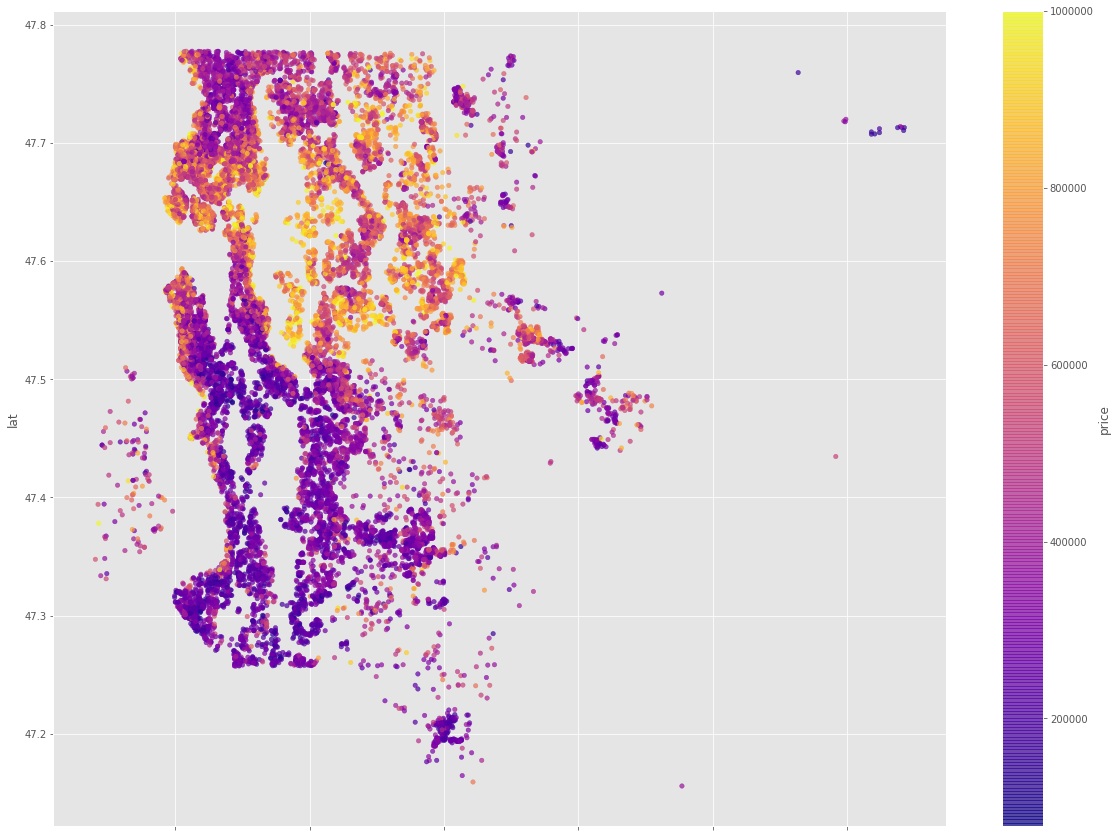

In [55]:
ax = df.plot.scatter('long', 'lat', c = 'price', alpha = 0.7,  figsize = (20, 15), cmap = 'plasma')

We can see generally, that higher priced houses tend to be clustered in the North as opposed to the South. Now, let's further investigate to see if houses in these regions are older or newer houses. For simplicity's sake, I will elect to filter out for houses built before 1970 and afterwards. Houses built within the past half century still seem relatively new as compared to houses built before that, so we will see if there are any noticeable patterns in terms of price 

In [56]:
# Filter for dataset before 2000
df_before_1970 = df.loc[df['yr_built'] < 1970]
df_before_1970.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  grade  \
0  221900.0         3       1.00         1180      5650     1.0      7   
1  538000.0         3       2.25         2570      7242     2.0      7   
2  180000.0         2       1.00          770     10000     1.0      6   
3  604000.0         4       3.00         1960      5000     1.0      7   
8  229500.0         3       1.00         1780      7470     1.0      7   

   sqft_above  yr_built      lat  ...  month_3  month_4  month_5  month_6  \
0        1180      1955  47.5112  ...        0        0        0        0   
1        2170      1951  47.7210  ...        0        0        0        0   
2         770      1933  47.7379  ...        0        0        0        0   
3        1050      1965  47.5208  ...        0        0        0        0   
8        1050      1960  47.5123  ...        0        1        0        0   

   month_7  month_8  month_9  month_10  month_11  month_12  
0        0        0        0         1         0         0  
1        0        0        0         0         0         1  
2        0        0        0         0         0         0  
3        0        0        0         0         0         1  
8        0        0        0         0         0         0  

[5 rows x 41 columns]

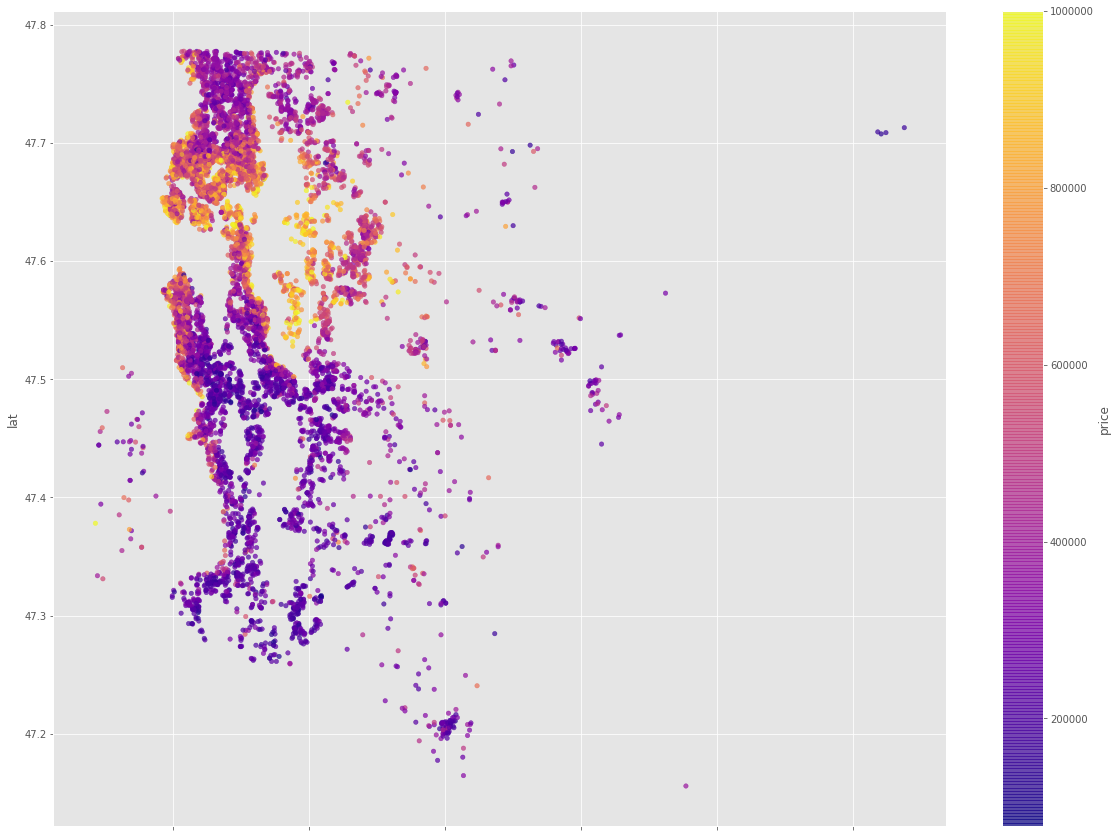

In [57]:
ax = df_before_1970.plot.scatter('long', 'lat', c = 'price', alpha = 0.7,  figsize = (20, 15), cmap = 'plasma')

In [58]:
# Filter for houses in the last half century 
df_after_1970 = df.loc[df['yr_built'] >= 1970]
df_after_1970.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  grade  \
4   510000.0         3       2.00         1680      8080     1.0      8   
6   257500.0         3       2.25         1715      6819     2.0      7   
9   323000.0         3       2.50         1890      6560     2.0      7   
13  400000.0         3       1.75         1370      9680     1.0      7   
15  650000.0         4       3.00         2950      5000     2.0      9   

    sqft_above  yr_built      lat  ...  month_3  month_4  month_5  month_6  \
4         1680      1987  47.6168  ...        0        0        0        0   
6         1715      1995  47.3097  ...        0        0        0        1   
9         1890      2003  47.3684  ...        1        0        0        0   
13        1370      1977  47.6127  ...        0        0        0        0   
15        1980      1979  47.5714  ...        0        0        0        0   

    month_7  month_8  month_9  month_10  month_11  month_12  
4         0        0        0         0         0         0  
6         0        0        0         0         0         0  
9         0        0        0         0         0         0  
13        0        0        0         1         0         0  
15        0        0        0         0         0         0  

[5 rows x 41 columns]

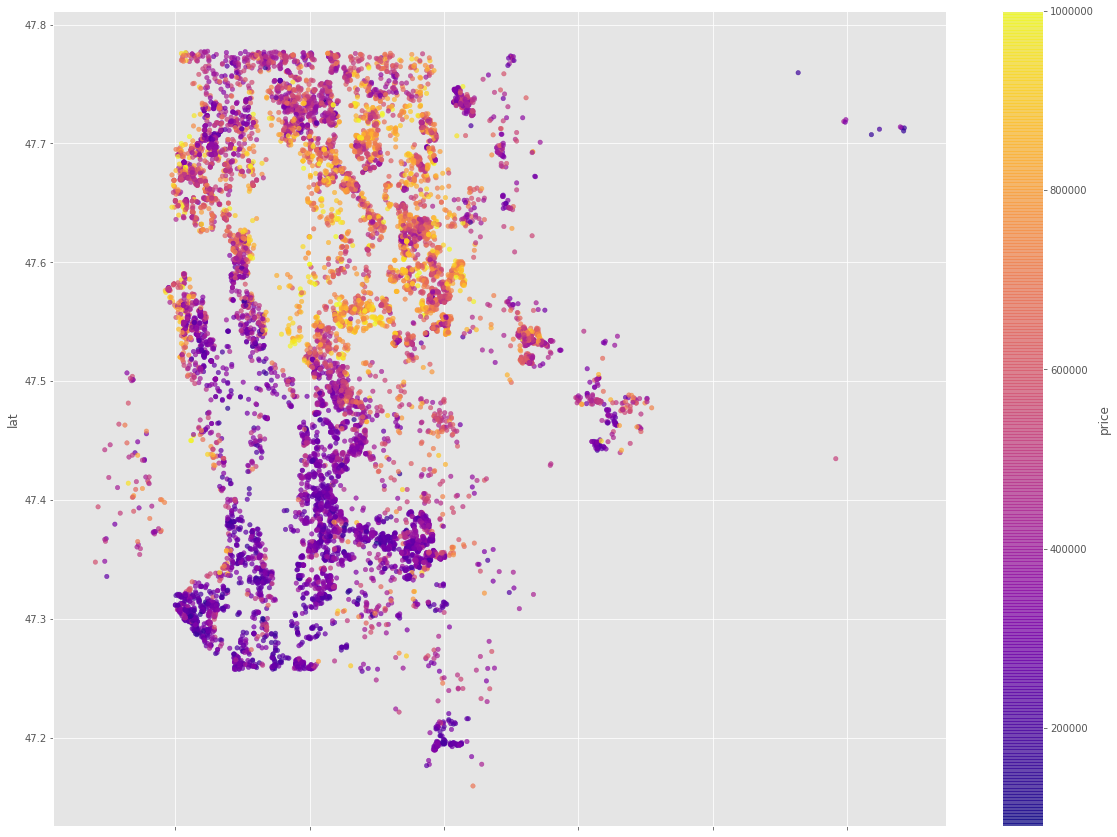

In [59]:
ax = df_after_1970.plot.scatter('long', 'lat', c = 'price', alpha = 0.7,  figsize = (20, 15), cmap = 'plasma')

As we can see, more expensive houses tend to populate more towards the North as time passes. We notice that there were not many expensive houses before 1970 that were in the Northern region. However, since the last half century, it seems that the more expensive houses generally tend to be clustered farther up North.

Let's get a general range of how much house's costed within these two time frames

In [60]:
df_before_1970.price.describe()

count       9349.000000
mean      446258.486683
std       197922.552090
min        78000.000000
25%       288000.000000
50%       414000.000000
75%       570000.000000
max      1000000.000000
Name: price, dtype: float64

In [61]:
df_after_1970.price.describe()

count      10619.000000
mean      488136.193615
std       192523.001197
min        90000.000000
25%       333495.000000
50%       450000.000000
75%       612000.000000
max      1000000.000000
Name: price, dtype: float64

Before 1970, houses costed on average 413303.50 dollars and after that, they costed on average 450000.00 dollars. The year that houses were built must have some sort of effect on influencing the price. Additionally, it seems that location does play a role in influencing housing prices, so let's build a small model to see the effect of these two variables combined

In [62]:
model = ols(formula = 'price~yr_built + lat + long', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     1894.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:55:29   Log-Likelihood:            -2.6918e+05
No. Observations:               19968   AIC:                         5.384e+05
Df Residuals:                   19964   BIC:                         5.384e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.36e+07   1.25e+06    -10.917      0.000    -1.6e+07   -1.12e+07
yr_built     569.2228     46.557     12.226      0.000     477.968     660.477
lat         6.523e+05   8786.790     74.234      0.000    6.35e+05     6.7e+05
long        1.479e+05   9501.070     15.568      0.000    1.29e+05    1.67e+05
==============================================================================
Omnibus:                     1431.691   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1756.092
Skew:                           0.717   Prob(JB):                         0.00
Kurtosis:                       3.237   Cond. No.                     2.01e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Most of the variance, as you can see given the low R-squared value, is not represented by the prediction model. There needs to be further investigation later on in the next section after the EDA process

# 2.2) What is the distribution of the sizes of houses? Does having a bigger house equate to having a higher grade

<b>2) Check Linear Regression Assumptions</b>

In [63]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  grade  \
0  221900.0         3       1.00         1180      5650     1.0      7   
1  538000.0         3       2.25         2570      7242     2.0      7   
2  180000.0         2       1.00          770     10000     1.0      6   
3  604000.0         4       3.00         1960      5000     1.0      7   
4  510000.0         3       2.00         1680      8080     1.0      8   

   sqft_above  yr_built      lat  ...  month_3  month_4  month_5  month_6  \
0        1180      1955  47.5112  ...        0        0        0        0   
1        2170      1951  47.7210  ...        0        0        0        0   
2         770      1933  47.7379  ...        0        0        0        0   
3        1050      1965  47.5208  ...        0        0        0        0   
4        1680      1987  47.6168  ...        0        0        0        0   

   month_7  month_8  month_9  month_10  month_11  month_12  
0        0        0        0         1         0         0  
1        0        0        0         0         0         1  
2        0        0        0         0         0         0  
3        0        0        0         0         0         1  
4        0        0        0         0         0         0  

[5 rows x 41 columns]

First, let's take a look at the general distribution of house sizes

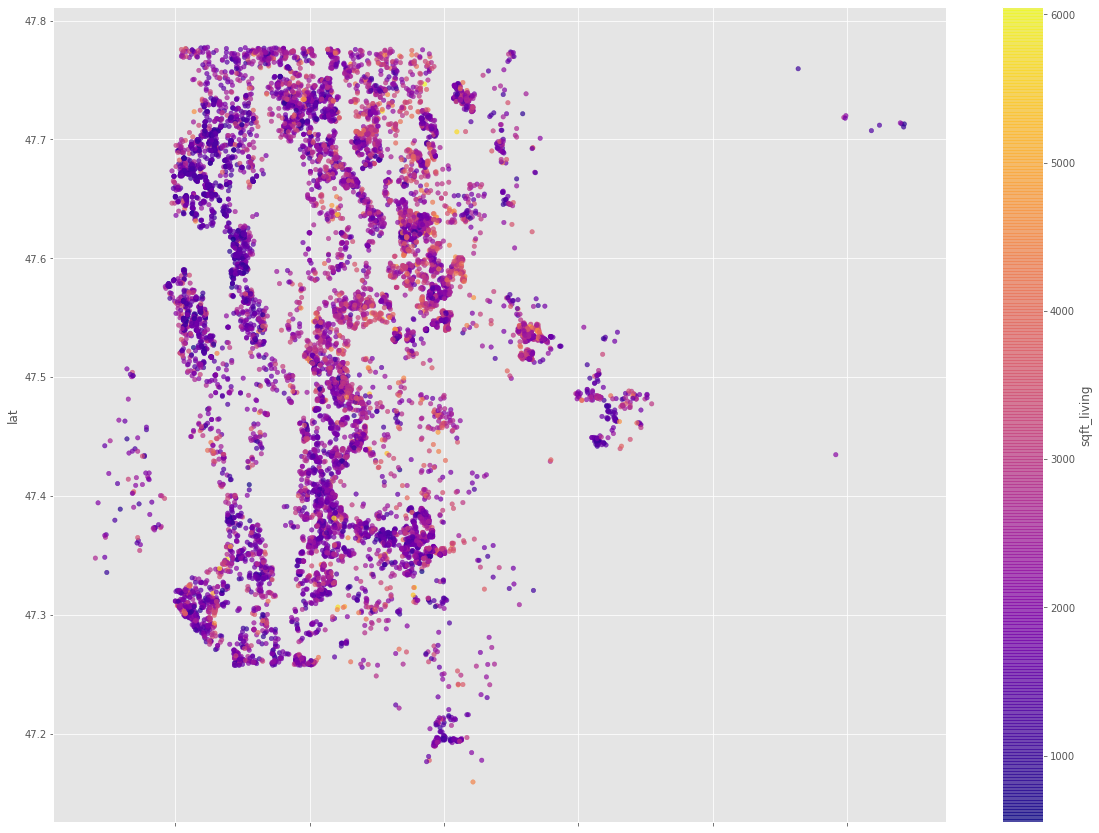

In [64]:
ax = df_after_1970.plot.scatter('long', 'lat', c = 'sqft_living', alpha = 0.7,  figsize = (20, 15), cmap = 'plasma')

This is a very interesting observation. As seen in the previous scatterplots, we notice that the Northern Region tends to have a cluster of more expensive houses. You would think that more expensive houses would presumably have a bigger square footage of land. However, based on this graph, you notice that most houses have around the same square footage of land. The bigger houses tended to be spread throughout equally, with no obvious clustering. The rest of the more average sized houses are found everywhere, regardless of the location. This means that the location itself of where houses are located must be a more important predictor of housing prices, as we concluded that prices were higher in the Northern Region, which probably indicates that that region is more of the 'downtown' area, presumably. Now, we will investigate to see if there is a correlation between the overall grade and condition of the houses in relation to the size of the house. In other words, does a smaller or larger sized house correlate with a higher/lower grade and condition, as determined by the King County.

In [65]:
print(df['sqft_living'].corr(df['grade']))

0.6912282438452019


As seen above, there is a 0.7 correlation, which definitely does indicate a good amount of correlation between the size of the house and its grade. That is pretty reasonable, as a house would presumably be rated higher because of its larger housing unit. Let's double check with the variable condition to see if a larger house would equate to a higher ranking. The conditions were split up into 5 different categories earlier, so we will iterate through each condition ranking. On the website, it indicates that 5 is the best condition value, and 1 is the worst.

In [66]:
cond_columns = ['cond_1', 'cond_2', 'cond_3', 'cond_4', 'cond_5']
for cond in cond_columns:
    print('Correlation Between {} and Sqft_lot:'.format(cond))
    print(df['sqft_living'].corr(df[cond]))
    print('-' * 39)
    print('\n')

Correlation Between cond_1 and Sqft_lot:
-0.033809950945725774
---------------------------------------


Correlation Between cond_2 and Sqft_lot:
-0.06450961736436046
---------------------------------------


Correlation Between cond_3 and Sqft_lot:
0.11247255098647496
---------------------------------------


Correlation Between cond_4 and Sqft_lot:
-0.08186193172508549
---------------------------------------


Correlation Between cond_5 and Sqft_lot:
-0.03984200228415122
---------------------------------------




As observed above, there is no correlation between the condition of a house and its size.

We can conclude that although a larger house may have a better grade assigned to it by the King County grading system, it does not necessarily imply that its condition is top notch. Okay, to summarize what we learned in the first two questions: the location of the houses tend to dictate the differing housing prices, with the Northern regions having a cluster of more expensive houses. Also, we concluded that having a higher grade ranked by King County generally meant that those houses were larger in size because the County probably assesses a housing unit's importance based on how much land it entails.  

With that in mind, let's proceed on to the last question. We declared that having a larger square footage for a house does not equate to a higher price. Let's see if having more bathrooms, floors, and/or bedrooms would indicate a higher house price. 

# 2.3) What combination of bathrooms, floors, and/or bedrooms indicates the higher price for houses? Are the findings significant enough?

In [67]:
model_2 = ols(formula = 'price ~ bathrooms', data=df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     4698.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:55:29   Log-Likelihood:            -2.6957e+05
No. Observations:               19968   AIC:                         5.391e+05
Df Residuals:                   19966   BIC:                         5.392e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.172e+05   3874.247     56.051      0.000     2.1e+05    2.25e+05
bathrooms    1.23e+05   1794.513     68.543      0.000    1.19e+05    1.27e+05
==============================================================================
Omnibus:                     1008.429   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1158.818
Skew:                           0.585   Prob(JB):                    2.32e-252
Kurtosis:                       2.846   Cond. No.                         8.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
model_2 = ols(formula = 'price ~ bedrooms', data=df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     1839.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:55:29   Log-Likelihood:            -2.7080e+05
No. Observations:               19968   AIC:                         5.416e+05
Df Residuals:                   19966   BIC:                         5.416e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.507e+05   5250.172     47.747      0.000     2.4e+05    2.61e+05
bedrooms    6.551e+04   1527.510     42.889      0.000    6.25e+04    6.85e+04
==============================================================================
Omnibus:                     1040.901   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.417
Skew:                           0.569   Prob(JB):                    9.40e-251
Kurtosis:                       2.703   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
model_2 = ols(formula = 'price ~ floors', data=df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     1539.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):          4.94e-324
Time:                        19:55:29   Log-Likelihood:            -2.7094e+05
No. Observations:               19968   AIC:                         5.419e+05
Df Residuals:                   19966   BIC:                         5.419e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.245e+05   3906.748     83.070      0.000    3.17e+05    3.32e+05
floors      9.777e+04   2492.229     39.229      0.000    9.29e+04    1.03e+05
==============================================================================
Omnibus:                     1191.953   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1360.865
Skew:                           0.624   Prob(JB):                    3.10e-296
Kurtosis:                       2.717   Cond. No.                         6.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

None of alone seem to have much of a impact on price. Bathroom seems to be the best, so let's try to build a model to test out what combinations might work together with that.

In [70]:
model_2 = ols(formula = 'price ~ bathrooms + bedrooms + floors', data=df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     1687.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:55:29   Log-Likelihood:            -2.6942e+05
No. Observations:               19968   AIC:                         5.389e+05
Df Residuals:                   19964   BIC:                         5.389e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.474e+05   5603.536     26.309      0.000    1.36e+05    1.58e+05
bathrooms   9.675e+04   2365.232     40.903      0.000    9.21e+04    1.01e+05
bedrooms    2.435e+04   1656.679     14.700      0.000    2.11e+04    2.76e+04
floors       2.88e+04   2693.610     10.692      0.000    2.35e+04    3.41e+04
==============================================================================
Omnibus:                      961.001   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1090.095
Skew:                           0.565   Prob(JB):                    1.94e-237
Kurtosis:                       2.814   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
model_2 = ols(formula = 'price ~ bathrooms + floors', data=df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     2397.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:55:30   Log-Likelihood:            -2.6953e+05
No. Observations:               19968   AIC:                         5.391e+05
Df Residuals:                   19965   BIC:                         5.391e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.01e+05   4278.503     46.981      0.000    1.93e+05    2.09e+05
bathrooms   1.138e+05   2070.730     54.975      0.000     1.1e+05    1.18e+05
floors      2.368e+04   2685.347      8.818      0.000    1.84e+04    2.89e+04
==============================================================================
Omnibus:                     1002.144   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1147.649
Skew:                           0.581   Prob(JB):                    6.18e-250
Kurtosis:                       2.831   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
model_2 = ols(formula = 'price ~bathrooms + bedrooms', data=df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     2460.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:55:30   Log-Likelihood:            -2.6948e+05
No. Observations:               19968   AIC:                         5.390e+05
Df Residuals:                   19965   BIC:                         5.390e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.718e+05   5134.345     33.456      0.000    1.62e+05    1.82e+05
bathrooms   1.093e+05   2058.352     53.107      0.000    1.05e+05    1.13e+05
bedrooms    2.206e+04   1647.428     13.392      0.000    1.88e+04    2.53e+04
==============================================================================
Omnibus:                      962.494   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1094.880
Skew:                           0.567   Prob(JB):                    1.78e-238
Kurtosis:                       2.827   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

None of these combinations seem to provide much meaningful R-squared values, so we can conclude that these features alone will definintely not be the driving factor on prices. Further investigations must be conducted. In the next section, we will determine if single-linear regression is a viable option by checking out 3 assumptions that must be met in order for single-linear regression to occur. If the requirements are not met, then we must move on to multi-variate linear regression

<b>3) Introduce the 3 Linear Regression Assumptions</b>

In order to perform any sort of Linear Regression Modelling, 3 assumptions must be met:
   - Linearity 
   - Normality
   - Homoscedasticity
   
Earlier, we already investigated a couple of features in relation to price. Now, let's iterate through each variable, regardless of it being continous or categorical, to see if single-linear regression can be conducted; if not, then we will elect to proceed to multi-variate linear regression. To check for these conditions, we will be iterating through each of the features individually and observing their linearity with scatterplots, qq-plots to plot the distribution of the residuals to check for normality and then observing the value of the Jarque-Bera test to confirm, and finally we will make use of the statsmodles module and the Goldfeld-Quant Test to confirm/eliminate the assumption of homoscedasticity 

Regression Analysis and Diagnostics for price~sqft_living
----------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                 1.138e+04
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:55:30   Log-Likelihood:            -2.6718e+05
No. Observations:               19968   AIC:                         5.344e+05
Df Residuals:                   19966   BIC:                         5.344e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P

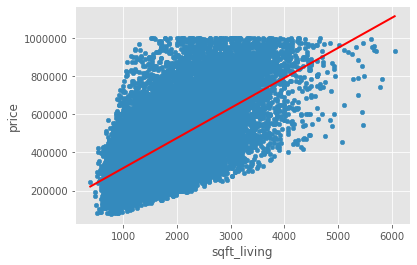

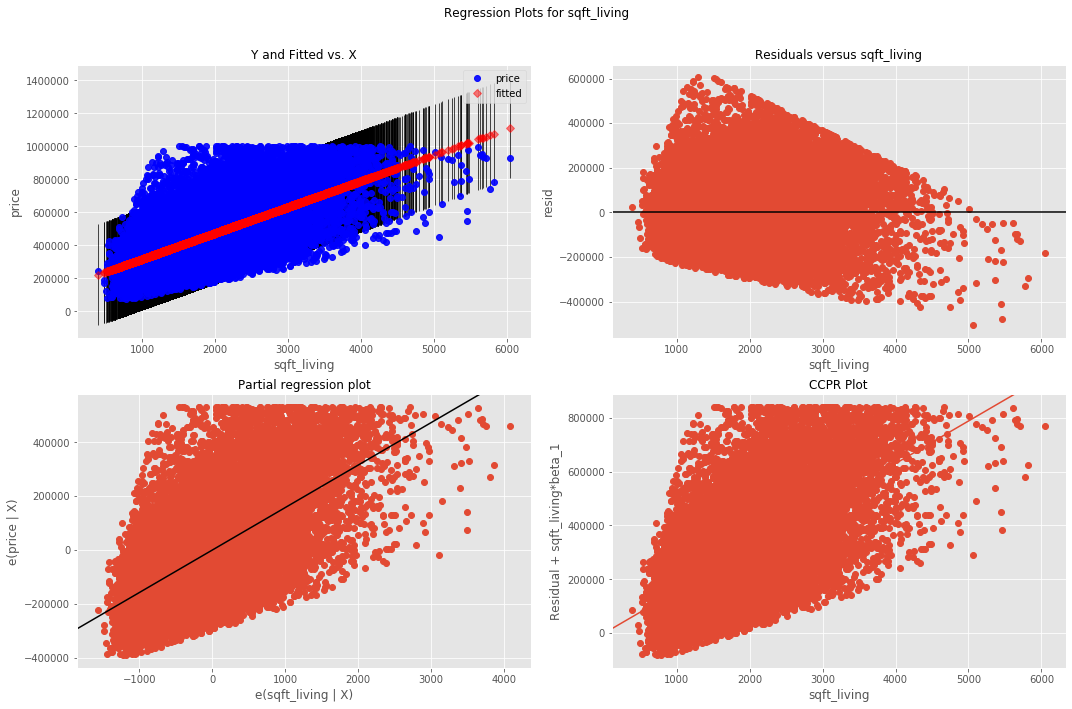

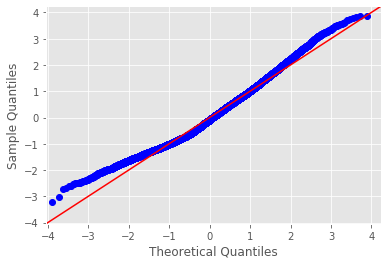

Goldfeld-Quant Test for Homoscedasticity
[('F statistic', 0.95451422912944), ('p-value', 0.9899741052676011)]



Regression Analysis and Diagnostics for price~sqft_lot
----------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     185.0
Date:                Tue, 21 Jul 2020   Prob (F-statistic):           6.08e-42
Time:                        19:55:32   Log-Likelihood:            -2.7159e+05
No. Observations:               19968   AIC:                         5.432e+05
Df Residuals:                   19966   BIC:                         5.432e+05
Df Model:                           1                                         
Covariance Type:    

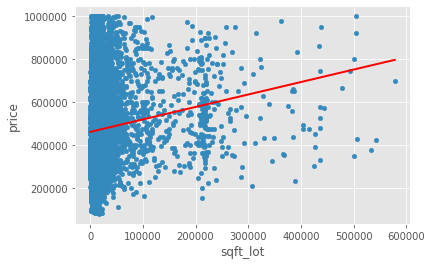

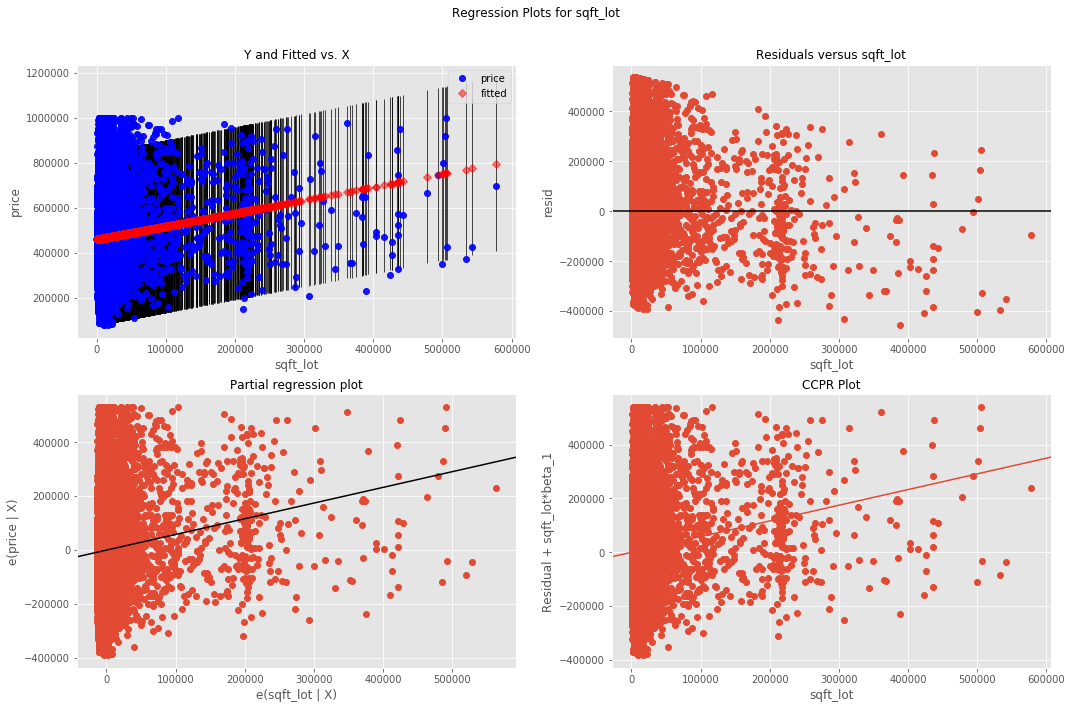

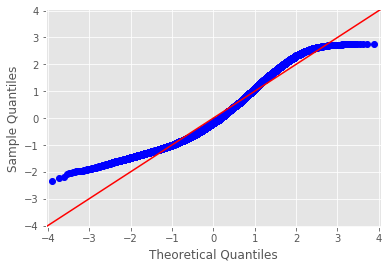

Goldfeld-Quant Test for Homoscedasticity
[('F statistic', 1.0055460469934174), ('p-value', 0.39116646007276185)]



Regression Analysis and Diagnostics for price~sqft_above
----------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     7143.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:55:36   Log-Likelihood:            -2.6863e+05
No. Observations:               19968   AIC:                         5.373e+05
Df Residuals:                   19966   BIC:                         5.373e+05
Df Model:                           1                                         
Covariance Type

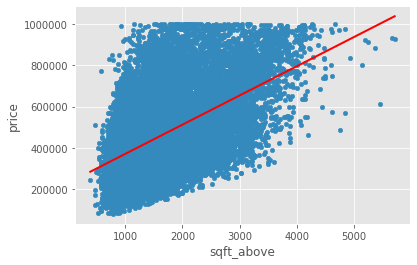

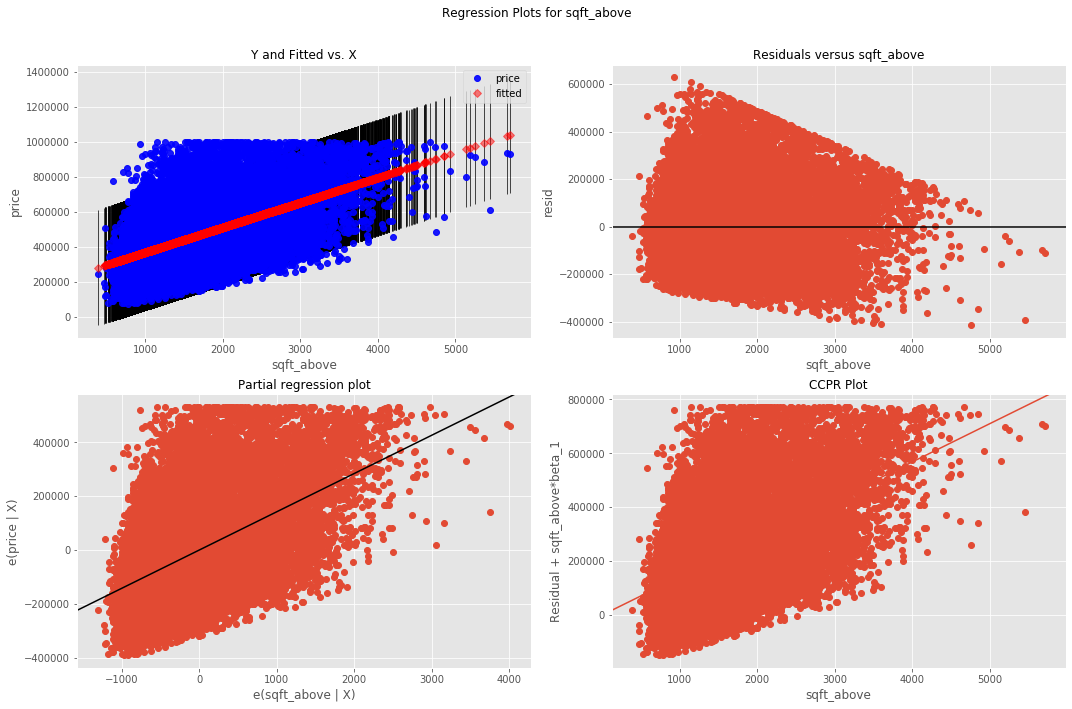

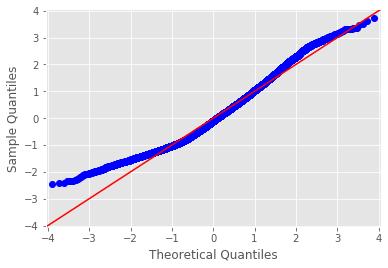

Goldfeld-Quant Test for Homoscedasticity
[('F statistic', 0.9848056358030469), ('p-value', 0.7778156555674992)]



Regression Analysis and Diagnostics for price~yr_built
----------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     58.02
Date:                Tue, 21 Jul 2020   Prob (F-statistic):           2.70e-14
Time:                        19:55:38   Log-Likelihood:            -2.7165e+05
No. Observations:               19968   AIC:                         5.433e+05
Df Residuals:                   19966   BIC:                         5.433e+05
Df Model:                           1                                         
Covariance Type:  

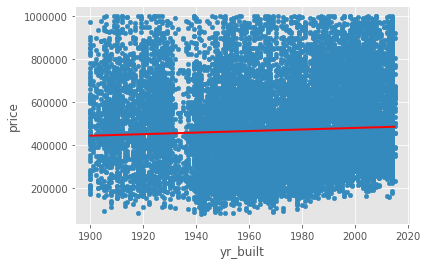

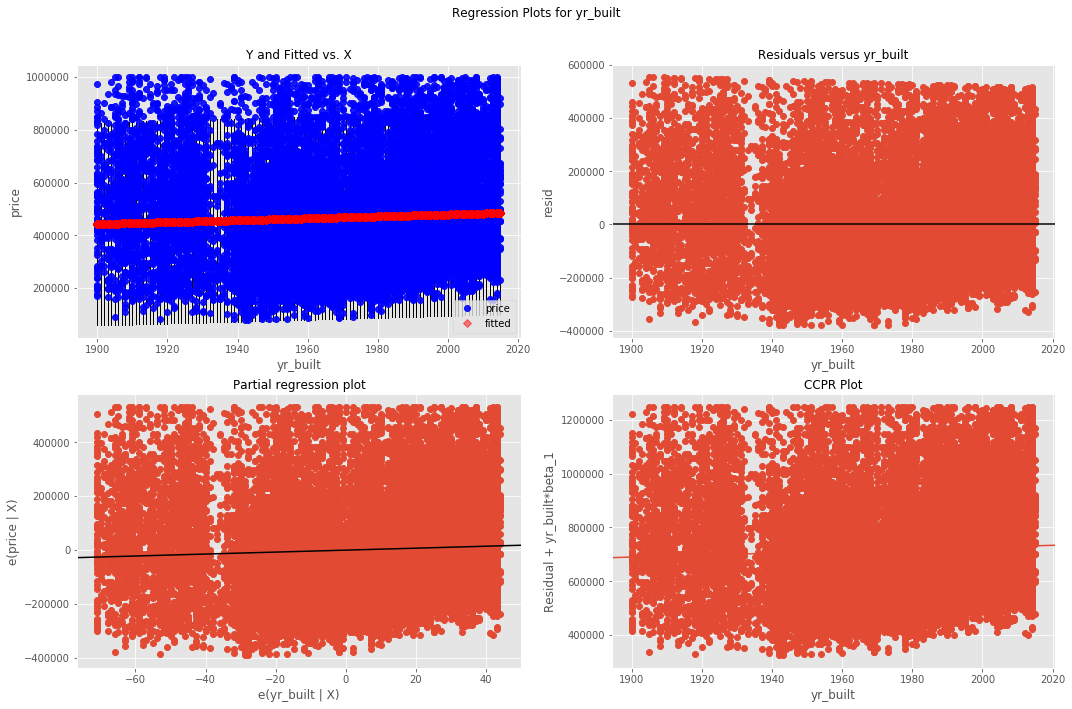

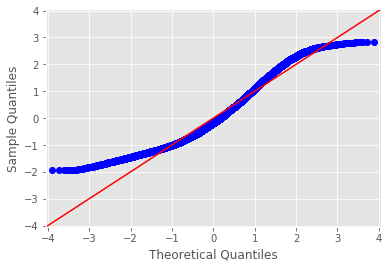

Goldfeld-Quant Test for Homoscedasticity
[('F statistic', 0.9932463427222658), ('p-value', 0.6325122250512094)]



Regression Analysis and Diagnostics for price~bedrooms
----------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     1839.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:55:41   Log-Likelihood:            -2.7080e+05
No. Observations:               19968   AIC:                         5.416e+05
Df Residuals:                   19966   BIC:                         5.416e+05
Df Model:                           1                                         
Covariance Type:  

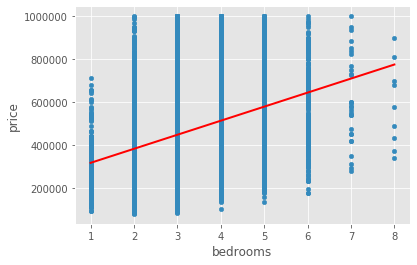

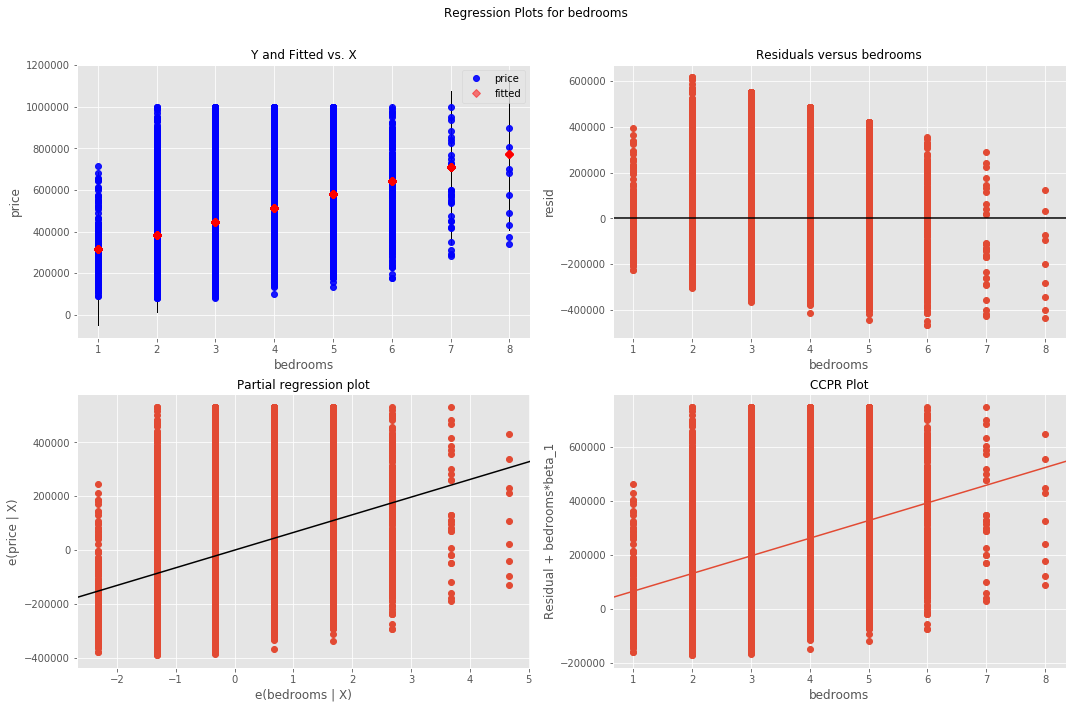

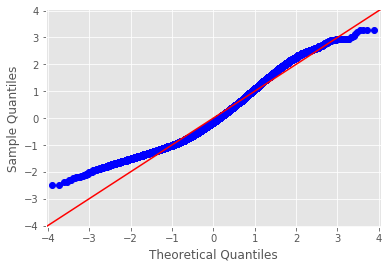

Goldfeld-Quant Test for Homoscedasticity
[('F statistic', 0.9884458273451824), ('p-value', 0.7192222671649933)]



Regression Analysis and Diagnostics for price~bathrooms
----------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     4698.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:55:44   Log-Likelihood:            -2.6957e+05
No. Observations:               19968   AIC:                         5.391e+05
Df Residuals:                   19966   BIC:                         5.392e+05
Df Model:                           1                                         
Covariance Type: 

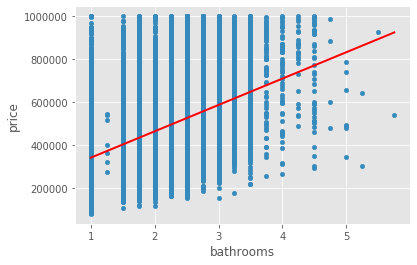

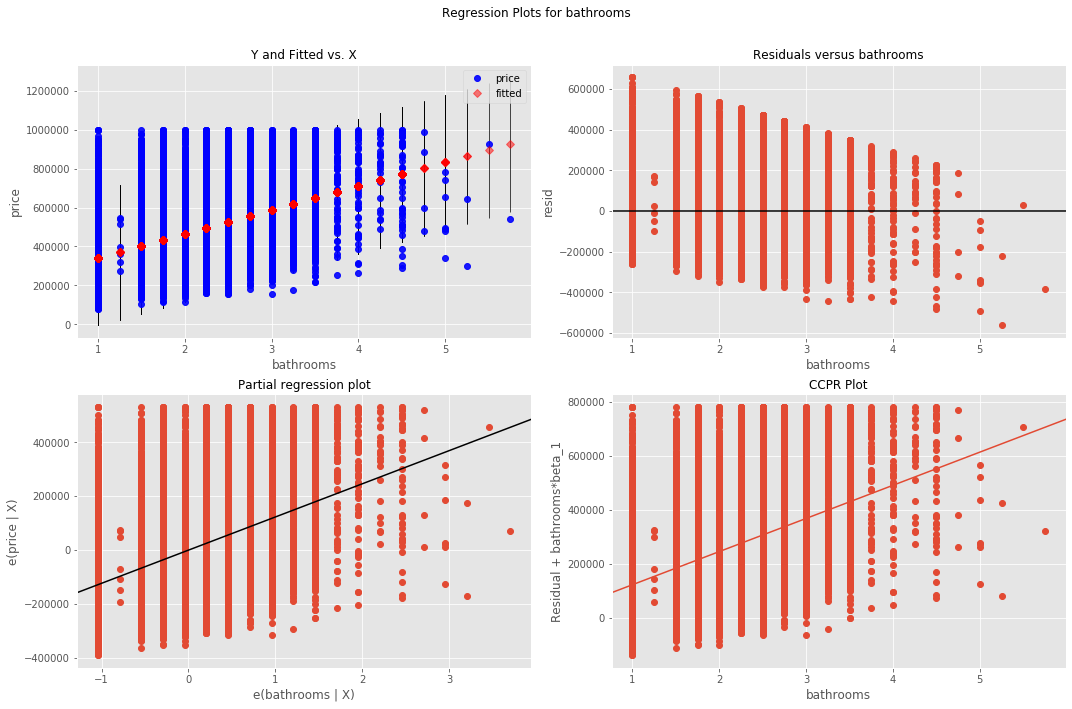

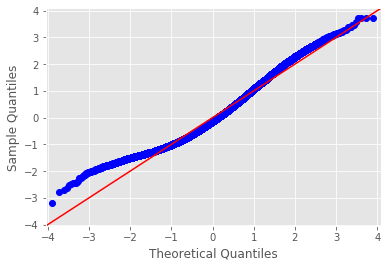

Goldfeld-Quant Test for Homoscedasticity
[('F statistic', 0.9901662647936571), ('p-value', 0.6892275500133814)]



Regression Analysis and Diagnostics for price~floors
----------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     1539.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):          4.94e-324
Time:                        19:55:47   Log-Likelihood:            -2.7094e+05
No. Observations:               19968   AIC:                         5.419e+05
Df Residuals:                   19966   BIC:                         5.419e+05
Df Model:                           1                                         
Covariance Type:    

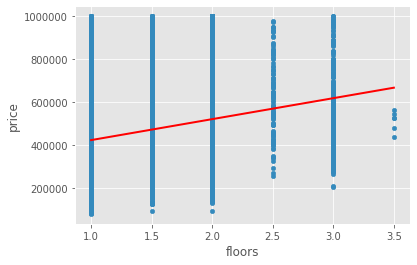

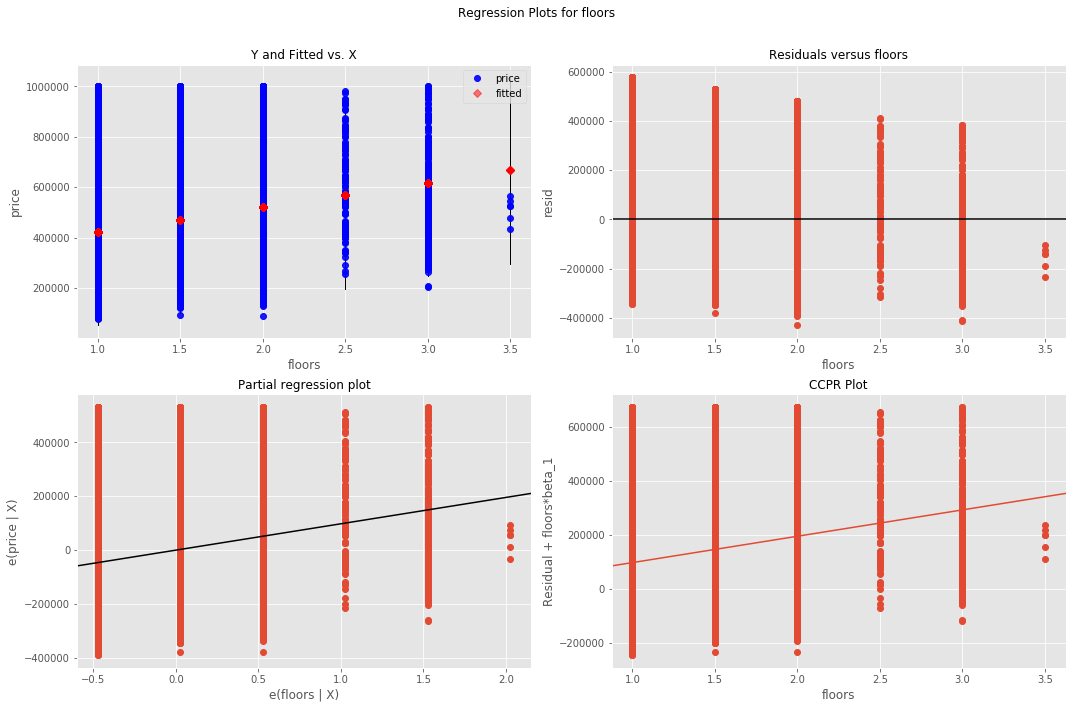

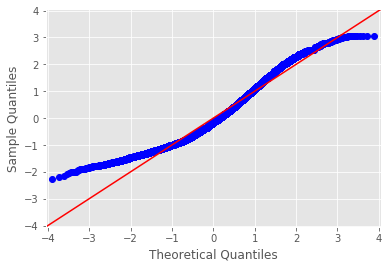

Goldfeld-Quant Test for Homoscedasticity
[('F statistic', 1.0143657784986682), ('p-value', 0.23807283734290546)]



Regression Analysis and Diagnostics for price~grade
----------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                 1.223e+04
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:55:50   Log-Likelihood:            -2.6691e+05
No. Observations:               19968   AIC:                         5.338e+05
Df Residuals:                   19966   BIC:                         5.338e+05
Df Model:                           1                                         
Covariance Type:    

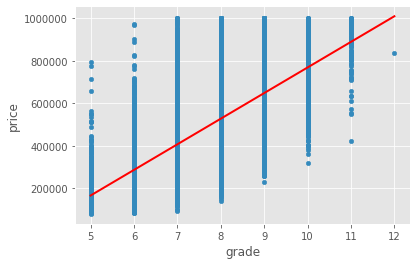

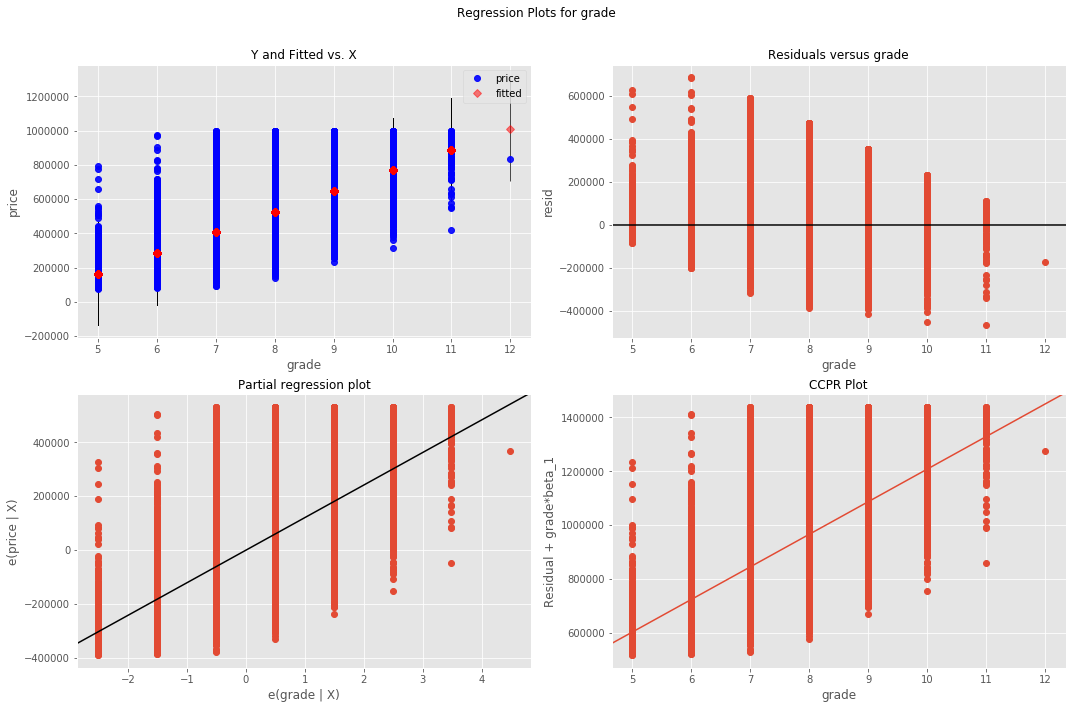

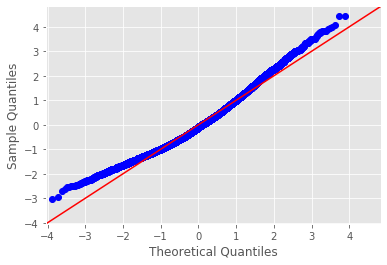

Goldfeld-Quant Test for Homoscedasticity
[('F statistic', 0.9684639587671563), ('p-value', 0.9452764872129666)]





In [73]:
# results list appending the model summary
results = []
# Make a list of continous variables to iterate through
features = ['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'bedrooms', 'bathrooms', 'floors', 'grade']

# for loop to iterate through each feature and create a formula out of it
for col in ['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'bedrooms', 'bathrooms', 'floors', 'grade']:
    print('Regression Analysis and Diagnostics for price~{}'.format(col))
    print('-' *100)
    f = f'price~{col}'
    model = smf.ols(formula = f, data = df).fit()
    print(model.summary())
    X_new = pd.DataFrame({f'{col}': [df[col].min(), df[col].max()]})
    preds = model.predict(X_new)
    df.plot(kind = 'scatter', x = '{}'.format(col), y = 'price');
    plt.plot(X_new, preds, c = 'red', linewidth = 2);
    plt.show()
    
    fig = plt.figure(figsize = (15, 10))
    fig = sm.graphics.plot_regress_exog(model, '{}'.format(col), fig = fig)
    fig = sm.graphics.qqplot(model.resid, dist = stats.norm, line = '45', fit = True)
    plt.show()
    name = ['F statistic', 'p-value']
    test = sms.het_goldfeldquandt(model.resid, model.model.exog)
    print('Goldfeld-Quant Test for Homoscedasticity')
    print(list(zip(name, test)))
    print('\n\n')
    results.append([col, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])

In [74]:
pd.DataFrame(results, columns=['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ])

ind_var  r_squared      intercept          slope       p-value  \
0  sqft_living   0.363019  160056.472008     157.510512  0.000000e+00   
1     sqft_lot   0.009180  460439.868200       0.581855  6.079972e-42   
2   sqft_above   0.263489  227662.056709     142.073074  0.000000e+00   
3     yr_built   0.002898 -247301.351868     363.206322  2.704122e-14   
4     bedrooms   0.084358  250682.479475   65513.435372  0.000000e+00   
5    bathrooms   0.190487  217156.502326  123002.090144  0.000000e+00   
6       floors   0.071562  324534.783830   97768.651382  0.000000e+00   
7        grade   0.379771 -439295.244196  120821.383465  0.000000e+00   

   normality (JB)  
0      775.895210  
1     1397.604958  
2     1048.565073  
3     1446.996125  
4     1151.416613  
5     1158.818201  
6     1360.864671  
7     1078.791438

Here is a detailed summary of our analysis on the regression assumptions: 
  - Linearity: None of the individual variables displayed a high linearity of approximately <b>0.75</b> or above based on the low r_squared values
  - Normality: None of the individual variables displayed a JB value of lower than <b>6</b> (this is the generally accepted rule   to conclude if a variable's errors are normally distributed or not) 
  - Homoscedasticity: None of the individual variables displayed a p-value of less than <b>0.05</b> in the Goldfeld-Quant test. The p-value for our tests tells us whether or not to reject the null-hypothesis of homoscedasticity. 

We can now move on to multi-variate linear regression

<b>4) Check for Multicollinearity</b>

In this section, we are checking to see if we can eliminate variables that are highly correlated with one another. The assumption in linear regression is that the dependent variable changes based on a change in an independent variable, with all other variables held constant. Now you can see why multicollinearnity may present and issue, as there may be overlapping effects on a target variable if two independent variables are highly correlated to one another. After we check for multicollinearity, we will perform stepwise selection to choose the features that provide us with the most value. 

In [75]:
df_features_new = df.drop(['price'], axis = 1)
y_new = df['price']

In [76]:
# Separate the target and predictor variables for modelling later purposes
df_features = df.drop(['price'], axis = 1)
y = df['price']

Generally, a range of 0.7-0.8 and above is considered a high correlation. Let's create a heatmap to observe the correlations above 0.7

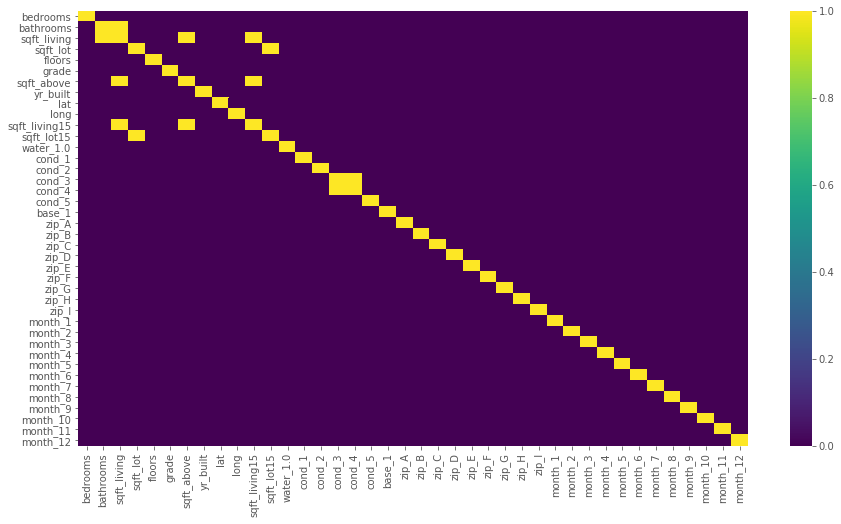

In [77]:
plt.figure(figsize = (15, 8))
sns.heatmap(abs(df_features.corr())> 0.70, cmap = 'viridis')

Based on the heatmap, we can see that numerous variables may need to be dropped to avoid multicollinearity. Let's find out which pair of variables are most correlated to one another using the .stack() method.

In [78]:
# This outputs the top highest correlated pairs
df_pairs = df_features.corr().abs().stack().reset_index().sort_values(0, ascending = False)
df_pairs['pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))
df_pairs.set_index(['pairs'], inplace = True)
df_pairs.drop(columns = ['level_1', 'level_0'], inplace = True)
df_pairs.columns = ['correlation']
df_pairs.drop_duplicates(inplace = True)

In [79]:
# Output the top correlated pairs
df_pairs[(df_pairs.correlation >.70) & (df_pairs.correlation <1)]

correlation
pairs                                    
(sqft_living, sqft_above)        0.848408
(cond_4, cond_3)                 0.818688
(sqft_lot, sqft_lot15)           0.770676
(sqft_living15, sqft_living)     0.734032
(sqft_living15, sqft_above)      0.713762
(sqft_living, bathrooms)         0.707383

Based on what we have seen in the heatmap and the table shown above, sqft_living, sqft_above, and sqft_living15 seem to appear a lot. Let's drop these to see how the heatmap looks like afterwards

In [80]:
df_features.drop(['sqft_living', 'sqft_above', 'sqft_living15'], axis = 1, inplace = True)
df_features.head()

bedrooms  bathrooms  sqft_lot  floors  grade  yr_built      lat     long  \
0         3       1.00      5650     1.0      7      1955  47.5112 -122.257   
1         3       2.25      7242     2.0      7      1951  47.7210 -122.319   
2         2       1.00     10000     1.0      6      1933  47.7379 -122.233   
3         4       3.00      5000     1.0      7      1965  47.5208 -122.393   
4         3       2.00      8080     1.0      8      1987  47.6168 -122.045   

   sqft_lot15  water_1.0  ...  month_3  month_4  month_5  month_6  month_7  \
0        5650          0  ...        0        0        0        0        0   
1        7639          0  ...        0        0        0        0        0   
2        8062          0  ...        0        0        0        0        0   
3        5000          0  ...        0        0        0        0        0   
4        7503          0  ...        0        0        0        0        0   

   month_8  month_9  month_10  month_11  month_12  
0        0        0         1         0         0  
1        0        0         0         0         1  
2        0        0         0         0         0  
3        0        0         0         0         1  
4        0        0         0         0         0  

[5 rows x 37 columns]

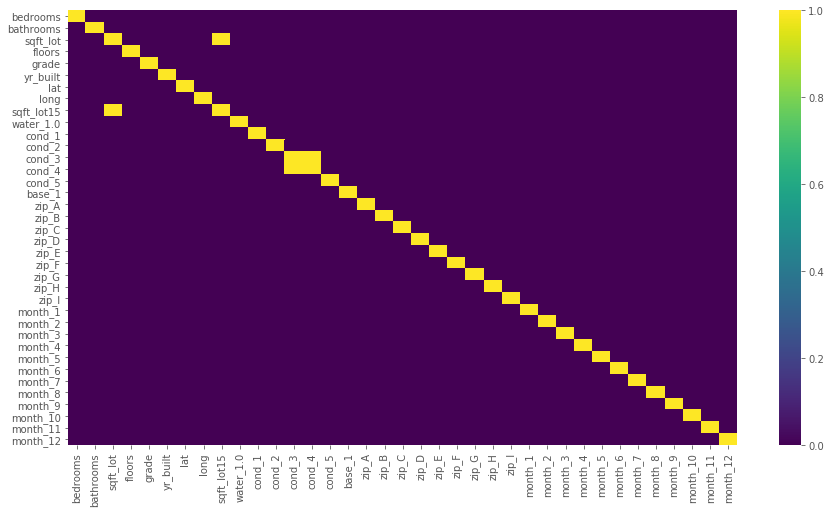

In [81]:
plt.figure(figsize = (15, 8))
sns.heatmap(abs(df_features.corr())> 0.70, cmap = 'viridis')

Let's also drop sqft_lot15 and cond_3

In [82]:
df_features.drop(['sqft_lot15', 'cond_3'], axis = 1, inplace = True)
df_features.head()

bedrooms  bathrooms  sqft_lot  floors  grade  yr_built      lat     long  \
0         3       1.00      5650     1.0      7      1955  47.5112 -122.257   
1         3       2.25      7242     2.0      7      1951  47.7210 -122.319   
2         2       1.00     10000     1.0      6      1933  47.7379 -122.233   
3         4       3.00      5000     1.0      7      1965  47.5208 -122.393   
4         3       2.00      8080     1.0      8      1987  47.6168 -122.045   

   water_1.0  cond_1  ...  month_3  month_4  month_5  month_6  month_7  \
0          0       0  ...        0        0        0        0        0   
1          0       0  ...        0        0        0        0        0   
2          0       0  ...        0        0        0        0        0   
3          0       0  ...        0        0        0        0        0   
4          0       0  ...        0        0        0        0        0   

   month_8  month_9  month_10  month_11  month_12  
0        0        0         1         0         0  
1        0        0         0         0         1  
2        0        0         0         0         0  
3        0        0         0         0         1  
4        0        0         0         0         0  

[5 rows x 35 columns]

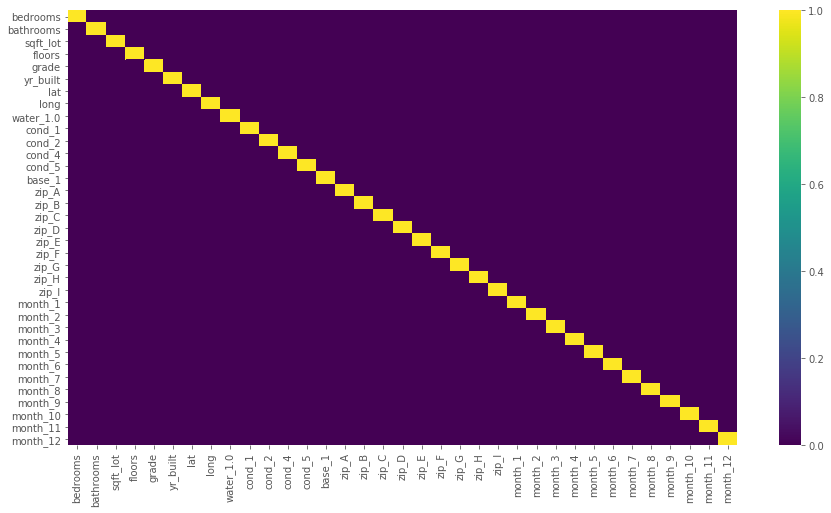

In [83]:
plt.figure(figsize = (15, 8))
sns.heatmap(abs(df_features.corr())> 0.70, cmap = 'viridis')

# 4) Final Model Building and Testing

In this section, we will investigate the following things

1) Perform stepwise selection with p-values to choose our final features before the model building process, and then proceed to scale those features to keep all measurements relative
    
2) Train and Test the Model to observe for any overfitting or underfitting

The last step before we build our model is to use stepwise selection with p-values to select the important features that we want to include in our model.

In [84]:
def stepwise_selection(df_features, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(df_features.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(df_features[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(df_features[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [85]:
df_selected = stepwise_selection(df_features, y, verbose = True)

C:\Users\edwar\anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  zip_F                          with p-value 0.0
Add  zip_D                          with p-value 0.0
Add  zip_H                          with p-value 0.0
Add  zip_E                          with p-value 0.0
Add  sqft_lot                       with p-value 2.33998e-61
Add  water_1.0                      with p-value 1.77661e-57
Add  bedrooms                       with p-value 4.11479e-47
Add  zip_I                          with p-value 1.51469e-27
Add  month_4                        with p-value 7.06287e-20
Add  cond_5                         with p-value 5.04412e-20
Add  cond_4                         with p-value 3.5834e-25
Add  lat                            with p-value 1.95403e-19
Add  zip_C                          with p-value 2.33996e-26
Add  floors                         with p-value 1.13348e-16
Add  month_3        

In [86]:
X_fin = df_features[['lat', 'bedrooms', 'grade', 'water_1.0','bathrooms']]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y, X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     5174.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:56:06   Log-Likelihood:            -2.6338e+05
No. Observations:               19968   AIC:                         5.268e+05
Df Residuals:                   19962   BIC:                         5.268e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.768e+07    3.1e+05    -89.373      0.000   -2.83e+07   -2.71e+07
lat         5.737e+05   6521.902     87.959      0.000    5.61e+05    5.86e+05
bedrooms    2.388e+04   1215.803     19.640      0.000    2.15e+04    2.63e+04
grade       9.707e+04   1154.405     84.089      0.000    9.48e+04    9.93e+04
water_1.0   3.197e+05   1.93e+04     16.526      0.000    2.82e+05    3.58e+05
bathrooms    2.63e+04   1805.391     14.566      0.000    2.28e+04    2.98e+04
==============================================================================
Omnibus:                     1568.368   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2085.225
Skew:                           0.684   Prob(JB):                         0.00
Kurtosis:                       3.797   Cond. No.                     1.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our model ended up with a 0.55 R-squared value. Let's see if we can raise the score to at least 0.7 by scaling it. The purpose of feature scaling is that often, your dataset will contain features that vary largely in magnitudes. If you leave these magnitudes unchanged, coefficient sizes will fluctuate largely in magnitude as well. This can give the false impression that some variables are less important than others.

In [87]:
# Use MinMaxScaler that ranges from 0 to 1 in standardization
scaler = MinMaxScaler()
scaler.fit(df_features)
scaled_data= scaler.transform(df_features)
df_features_final = pd.DataFrame(scaled_data)

In [88]:
df_features_final.columns = df_features.columns
df_features_final.head()

bedrooms  bathrooms  sqft_lot  floors     grade  yr_built       lat  \
0  0.285714   0.000000  0.008890     0.0  0.285714  0.478261  0.571498   
1  0.285714   0.263158  0.011648     0.4  0.285714  0.443478  0.908959   
2  0.142857   0.000000  0.016427     0.0  0.142857  0.286957  0.936143   
3  0.428571   0.421053  0.007763     0.0  0.285714  0.565217  0.586939   
4  0.285714   0.210526  0.013100     0.0  0.428571  0.756522  0.741354   

       long  water_1.0  cond_1  ...  month_3  month_4  month_5  month_6  \
0  0.217608        0.0     0.0  ...      0.0      0.0      0.0      0.0   
1  0.166113        0.0     0.0  ...      0.0      0.0      0.0      0.0   
2  0.237542        0.0     0.0  ...      0.0      0.0      0.0      0.0   
3  0.104651        0.0     0.0  ...      0.0      0.0      0.0      0.0   
4  0.393688        0.0     0.0  ...      0.0      0.0      0.0      0.0   

   month_7  month_8  month_9  month_10  month_11  month_12  
0      0.0      0.0      0.0       1.0       0.0       0.0  
1      0.0      0.0      0.0       0.0       0.0       1.0  
2      0.0      0.0      0.0       0.0       0.0       0.0  
3      0.0      0.0      0.0       0.0       0.0       1.0  
4      0.0      0.0      0.0       0.0       0.0       0.0  

[5 rows x 35 columns]

In [89]:
y.reset_index(inplace = True, drop = True)
df_features_final.reset_index(inplace = True, drop = True)

In [90]:
X_fin = df_features_final
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1288.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:56:06   Log-Likelihood:            -2.6028e+05
No. Observations:               19968   AIC:                         5.206e+05
Df Residuals:                   19934   BIC:                         5.209e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.392e+05   6914.848     20.124      0.000    1.26e+05    1.53e+05
bedrooms    8.799e+04   7583.408     11.603      0.000    7.31e+04    1.03e+05
bathrooms   2.576e+05   8689.869     29.645      0.000    2.41e+05    2.75e+05
sqft_lot     2.73e+05   1.48e+04     18.434      0.000    2.44e+05    3.02e+05
floors      6.186e+04   5296.845     11.679      0.000    5.15e+04    7.22e+04
grade       7.459e+05   7477.810     99.746      0.000    7.31e+05    7.61e+05
yr_built   -2.302e+05   4824.536    -47.712      0.000    -2.4e+05   -2.21e+05
lat         1.011e+05   8429.728     11.993      0.000    8.46e+04    1.18e+05
long       -7.861e+04   1.76e+04     -4.457      0.000   -1.13e+05    -4.4e+04
water_1.0   2.769e+05   1.68e+04     16.514      0.000    2.44e+05     3.1e+05
cond_1     -4.308e+04   2.19e+04     -1.970      0.049    -8.6e+04    -206.158
cond_2      -3.23e+04   8884.850     -3.636      0.000   -4.97e+04   -1.49e+04
cond_4       1.79e+04   1985.455      9.015      0.000     1.4e+04    2.18e+04
cond_5      3.666e+04   3224.670     11.369      0.000    3.03e+04     4.3e+04
base_1      1.645e+04   1947.916      8.444      0.000    1.26e+04    2.03e+04
zip_A       4.899e+04   3545.331     13.817      0.000     4.2e+04    5.59e+04
zip_B       7.467e+04   3949.154     18.909      0.000    6.69e+04    8.24e+04
zip_C       1.065e+05   2738.878     38.896      0.000    1.01e+05    1.12e+05
zip_D      -7.482e+04   2713.256    -27.575      0.000   -8.01e+04   -6.95e+04
zip_E      -4.743e+04   3651.764    -12.989      0.000   -5.46e+04   -4.03e+04
zip_F      -9.102e+04   3761.771    -24.195      0.000   -9.84e+04   -8.36e+04
zip_G       8.478e+04   4075.115     20.804      0.000    7.68e+04    9.28e+04
zip_H      -3.069e+04   3781.598     -8.116      0.000   -3.81e+04   -2.33e+04
zip_I       6.814e+04   6666.946     10.221      0.000    5.51e+04    8.12e+04
month_1     5389.7685   3523.485      1.530      0.126   -1516.555    1.23e+04
month_2     1.401e+04   3133.338      4.472      0.000    7869.815    2.02e+04
month_3      3.01e+04   2637.013     11.413      0.000    2.49e+04    3.53e+04
month_4     3.517e+04   2446.805     14.374      0.000    3.04e+04       4e+04
month_5     1.261e+04   2361.884      5.340      0.000    7983.785    1.72e+04
month_6     8371.6547   2480.790      3.375      0.001    3509.101    1.32e+04
month_7     9152.9306   2448.514      3.738      0.000    4353.640     1.4e+04
month_8     7042.5511   2583.460      2.726      0.006    1978.755    1.21e+04
month_9     8006.3023   2676.734      2.991      0.003    2759.681    1.33e+04
month_10    5170.5254   2631.823      1.965      0.049      11.934    1.03e+04
month_11    2947.4819   2970.878      0.992      0.321   -2875.686    8770.650
month_12    1182.4852   2930.537      0.404      0.687   -4561.611    6926.581
==

<b>2) Train-Test Split 

In [91]:
X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.20)

In [92]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15974 3994 15974 3994


In [93]:
linreg = LinearRegression()
# Fit the training model for predictions
linreg.fit(X_train, y_train)
# Training set predictions
y_hat_train = linreg.predict(X_train)
# Testing set predictions
y_hat_test = linreg.predict(X_test)

In [94]:
# Look at residuals and calculate MSE for training and testing sets
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 12428804130.608492
Test Mean Squarred Error: 11743857899.984571


In [95]:
R_squared = linreg.score(X_test, y_test)
print('This iteration has an R-squared value of:', R_squared)

This iteration has an R-squared value of: 0.688335686366063


We will iterate over a range of train-test split sizes from .5 to .95. For each of these, we will generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits

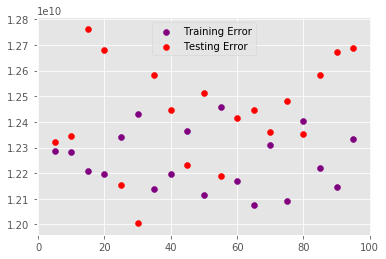

In [96]:
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error', color = 'purple')
plt.scatter(t_sizes, test_err, label='Testing Error', color = 'red')
plt.legend()

The graph above shows that there is not much overfitting, nor underfitting. If the model was overfitted, the testing erros would be almost identically distributed as the training error, and if it was underfitted, there would be no clear relationship between the training and testing error; the testing errors would sort of be all over the place and not really follow the distribution of the training error. We can now observe for normality of the residuals with scatterplots and histograms

(array([  1.,   6.,  26.,  81., 200., 386., 231.,  56.,  10.,   1.]),
 array([-510785.78555243, -416437.35788105, -322088.93020967,
        -227740.50253828, -133392.0748669 ,  -39043.64719552,
          55304.78047587,  149653.20814725,  244001.63581863,
         338350.06349002,  432698.4911614 ]),
 <a list of 10 Patch objects>)

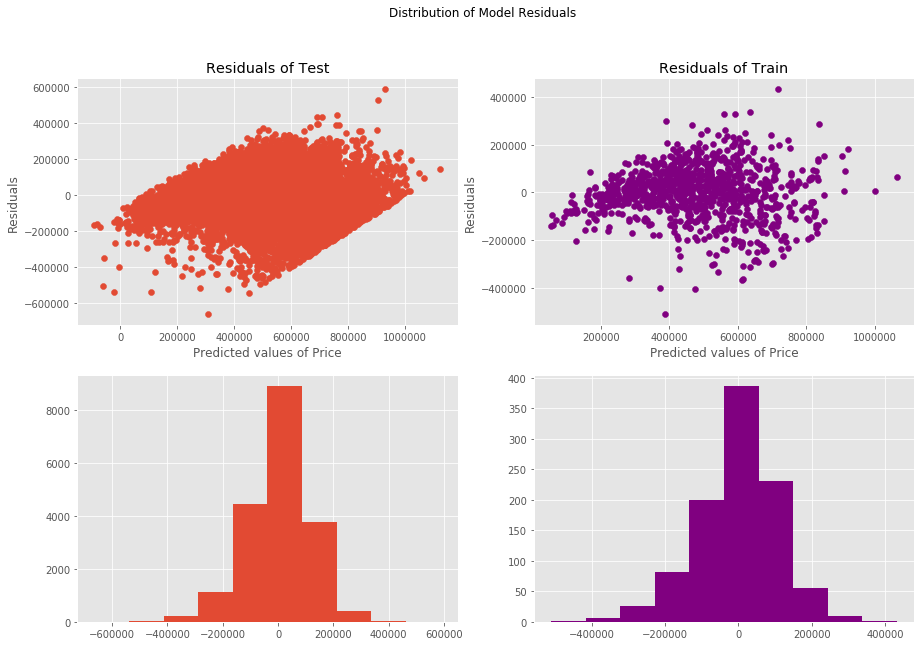

In [97]:
residuals_train = y_hat_train - y_train
residuals_test = y_hat_test - y_test

fig = plt.figure(figsize=(15,10))
fig.suptitle("Distribution of Model Residuals")

ax1 = fig.add_subplot(2,2,1) #Scatterplot of test residuals
ax1.scatter(x=y_hat_test, y=residuals_test)
ax1.set_title('Residuals of Test')
ax1.set_xlabel('Predicted values of Price')
ax1.set_ylabel('Residuals')

ax2 = fig.add_subplot(2,2,2) #Scatterplot of train residuals
ax2.scatter(x=y_hat_train, y=residuals_train, c='purple')
ax2.set_title('Residuals of Train')
ax2.set_xlabel('Predicted values of Price')
ax2.set_ylabel('Residuals')

ax3 = fig.add_subplot(2,2,3) #Histogram of test residuals
ax3.hist(residuals_test) 

ax4 = fig.add_subplot(2,2,4) #Histogram of train residuals
ax4.hist(residuals_train, color='purple')

These both appear to be relatively normal, and thus is homoscedasticitic

When using train-test split, random samples of data are created for the training and the test set. The problem with this is that the training and test MSE strongly depend on how the training and test sets were created. That's where cross validation comes in, as it expands on the idea of training and test splits by splitting the entire dataset into {K} equal sections of data. We'll then iteratively train {K} linear regression models on the data, with each linear model using a different section of data as the test set, and all other sections combined as the training set. We can then average the individual results frome each of these linear models to get a Cross-Validation MSE. This will be closer to the model's actual MSE, since "noisy" results that are higher than average will cancel out the "noisy" results that are lower than average.

In [98]:
# Cross Validation with 5 folds
cv_5_results  = np.mean(cross_val_score(linreg, df_features, y, cv=5,  scoring='neg_mean_squared_error'))

In [99]:
cv_5_results = abs(cv_5_results)

In [100]:
# Train-test MSE with test_residuals
test_residuals = y_hat_test - y_test
test_mse = mean_squared_error(y_test, y_hat_test)

In [101]:
print('Train-Test Split Method MSE: {} '.format(test_mse))
print('5-Fold Cross Validation Method MSE: {} '.format(cv_5_results))

Train-Test Split Method MSE: 12687528679.661484 
5-Fold Cross Validation Method MSE: 12404095701.728384 


The errors are relatively similar, but when possible, it is always better to use the cross validation method. Now that we have observed that our model is not too under or overfitted and that our model's residuals are relatively normally distributed, we can create our final model.

# FINAL MODEL ANALYSIS

Our model will follow the following formula: <b> 𝑦̂ = 𝛽̂0 + 𝛽̂1𝑥1+ 𝛽̂2𝑥2+ …+𝛽̂𝑛𝑥𝑛 </b>

- 𝑦̂: "fitted line" or the predicted value associated with the predictor variables.
- 𝛽̂0: Intercept
- 𝛽̂1, 𝛽̂2: Coefficients of each selected predictor variable
- x1, x2: Predictor variables
- n: Number of predictors

We need to find out what the intercept is, and then we need to find out the coefficients for each of our predictor variables. We know our predictor variables already and 'n'.

In [102]:
# Obtain intercept
linreg.intercept_

-15084887.708780877

In [103]:
# Obtain the selected predictor variable's coefficient
coefficients = dict(zip(df_features ,list(linreg.coef_)))
coefficients

{'bedrooms': 12878.097771702329,
 'bathrooms': 47436.06523557232,
 'sqft_lot': 0.3836966367396934,
 'floors': 36414.18157537556,
 'grade': 115566.38848686725,
 'yr_built': -2094.4653261986136,
 'lat': 145883.80242232038,
 'long': -95403.30329898874,
 'water_1.0': 224425.16740679726,
 'cond_1': -149762.0223622139,
 'cond_2': 20431.85025290663,
 'cond_4': 22055.35160115509,
 'cond_5': 37917.84024645214,
 'base_1': 6853.345852510688,
 'zip_A': 21208.76961225704,
 'zip_B': 63174.98545072337,
 'zip_C': 87512.34042074978,
 'zip_D': -108215.80212335917,
 'zip_E': -78252.65111534524,
 'zip_F': -118478.27823912677,
 'zip_G': 76496.17380546499,
 'zip_H': -28672.087054812135,
 'zip_I': 85226.54924267704,
 'month_1': -36057.2993036512,
 'month_2': 3859.6970542023532,
 'month_3': 14403.198698502525,
 'month_4': 11754.768616874371,
 'month_5': 4071.8882423971017,
 'month_6': -158.3321389586997,
 'month_7': 2517.3955156763004,
 'month_8': 8224.708865112585,
 'month_9': 3587.359581103324,
 'month_10':

<i>lat: 145883.80, bedrooms: 12878.10, grade: 115566.39, water_1.0: 224425.17, bathrooms: 47436.07</i>

<b>Analysis of Findings</b>

Let's talk about what all these coefficients mean. Each coefficient essentially tells us how much value an individual attribute provides to the overall value of the price of a house. 
 - <i>Lat</i>: As we saw in the EDA section, latitude is an important factor in house prices, as houses farther up in 
   the North were more expensive. Thus, based on the information shown, we can reasonably infer that being farther 
   up North can add a good amount of value - specifically <i>145883.80 USD</i>
   
 - <i>Bedrooms</i>: Having bedrooms can bring a modest amount of <i>12878.10 USD</i>
 
 - <i>Grade</i>: The grading assigned to a housing unit can drive up a house's price massively. In our model, it is the second
   highest coefficient for a predictor variable. As seen in the EDA section, we can confirm this finding 
   as we notice a correlation between the price of a house and its grade. Grade brings in <i>115566.39 USD</i> in value
   
 - <i>Bathrooms</i>: Bathrooms was an important predictor variable from the start. It had a big impact on our r-squared value
   if we chose not to include it. Bathrooms bring in a large amount of <i>47436.07 USD</i>, and this 
   seems reasonble because most people would be satisfied with having more bathrooms.
   
 - <i>Waterfront</i>: Waterfront was not something that was explored in detail but after some experimentation, waterfront was actually a very important predictor variable brining in <i>224425.17 USD</i>

# FINAL MODEL 

<i>𝑦̂ = 224425.17(waterfront) + 145883.80(Lat) + 115566.39(Grade) + 47436.07(Bathrooms) + 12878.10(Bedrooms) - 15084887.70 </i>

In [104]:
yhat = linreg.predict(df_features)

Final R-Squared Value: 0.688335686366063


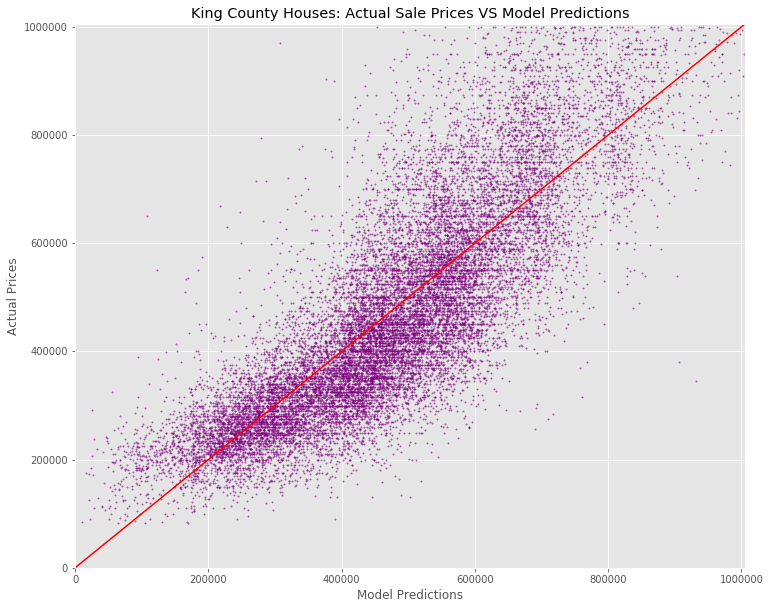

In [105]:
plt.figure(figsize = (12,10))
print('Final R-Squared Value: {}'.format(R_squared))
# Plot the actual and predicted values
plt.scatter(yhat, y, color = 'purple', s=2, alpha = 0.5)
plt.plot([0,1005000], [0,1005000], color='red')

# Set ranges for values
plt.xlim(0,1005000)
plt.ylim(0,1005000)

plt.title('King County Houses: Actual Sale Prices VS Model Predictions')
plt.xlabel('Model Predictions')
plt.ylabel('Actual Prices');